 # Concrete Strength Prediction

<img src="https://miro.medium.com/max/1200/1*K6ctE0RZme0cqMtknrxq8A.png">

## Concrete 
There are many parameters of concrete that influence its strength gaining characteristics.<br>
This study is an attempt to use the available data, to predict the concrete strength ana by deploying feature engineering and model tuning to obtain 80% to 95% of R2 score. <br>

The Compressive Strength of Concrete determines the quality of Concrete. <br> 
This is generally determined by a standard crushing test on a concrete cylinder. This requires engineers to build small concrete cylinders with different combinations of raw materials and test these cylinders for strength variations with a change in each raw material.<br>
The recommended wait time for testing the cylinder is 28 days to ensure correct results. This consumes a lot of time and requires a lot of labour to prepare different prototypes and test them. Also, this method is prone to human error and one small mistake can cause the wait time to drastically increase.<br>
The concrete compressive strength is a highly nonlinear function of age and ingredients .These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.<br>

One way of reducing the wait time and reducing the number of combinations to try is to make use of digital simulations, where we can provide information to the computer about what we know and the computer tries different combinations to predict the compressive strength. <br>
This way we can reduce the number of combinations we can try physically and reduce the amount of time for experimentation. But, to design such software we have to know the relations between all the raw materials and how one material affects the strength. It is possible to derive mathematical equations and run simulations based on these equations, but we cannot expect the relations to be same in real-world. Also, these tests have been performed for many numbers of times now and we have enough real-world data that can be used for predictive modelling.<br>
The compressive strength of concrete can be calculated by the failure load divided with the cross sectional area resisting the load and reported in pounds per square inch in US customary units and mega pascals (MPa) in SI units. Concrete's compressive strength requirements can vary from 2500 psi (17 MPa) for residential concrete to 4000psi (28 MPa) and higher in commercial structures. Higher strengths upto and exceeding 10,000 psi (70 MPa) are specified for certain applications.

## Objective
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

## Info from the dataset
The dataset consists of 1030 instances with 9 attributes and has no missing values. There are 8 input variables and 1 output variable. Seven input variables represent the amount of raw material (measured in kg/m³) and one represents Age (in Days). The target variable is Concrete Compressive Strength measured in (MPa — Mega Pascal). We shall explore the data to see how input features are affecting compressive strength.


## Attribute information
Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable <br>
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Age -- quantitative -- Day (1~365) -- Input Variable<br>
Concrete compressive strength -- quantitative -- MPa(megapascals) -- Output Variable<br>

<center>******************</center>

In [1]:
pip install more-itertools

Note: you may need to restart the kernel to use updated packages.


In [2]:

# Import the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
pd.options.display.float_format='{:.3f}'.format
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Load the dataset and Read the data as a data frame

In [4]:
data= pd.read_csv('concrete.csv')
data = data.copy()

<center>******************</center>

<img src="https://fiverr-res.cloudinary.com/images/t_main1,q_auto,f_auto,q_auto,f_auto/gigs/128464432/original/475f5e9684bb7d43fce2dd830aedac4a9a168808/do-binary-class-classification-in-python.jpg">

## Exploratory data quality report

1. <b>Univariate analysis</b> – data types and description of the independent attributes
which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers, duplicates 

## Understanding the data

In [5]:
data.head() #check data for anamolies

cement    slag     ash   water  superplastic  coarseagg  fineagg  age  \
0 141.300 212.000   0.000 203.500         0.000    971.800  748.500   28   
1 168.900  42.200 124.300 158.300        10.800   1080.800  796.200   14   
2 250.000   0.000  95.700 187.400         5.500    956.900  861.200   28   
3 266.000 114.000   0.000 228.000         0.000    932.000  670.000   28   
4 154.800 183.400   0.000 193.300         9.100   1047.400  696.700   28   

   strength  
0    29.890  
1    23.510  
2    29.220  
3    45.850  
4    18.290

In [6]:
data.tail() #check data for anamolies

cement    slag     ash   water  superplastic  coarseagg  fineagg  age  \
1025 135.000   0.000 166.000 180.000        10.000    961.000  805.000   28   
1026 531.300   0.000   0.000 141.800        28.200    852.100  893.700    3   
1027 276.400 116.000  90.300 179.600         8.900    870.100  768.300   28   
1028 342.000  38.000   0.000 228.000         0.000    932.000  670.000  270   
1029 540.000   0.000   0.000 173.000         0.000   1125.000  613.000    7   

      strength  
1025    13.290  
1026    41.300  
1027    44.280  
1028    55.060  
1029    52.610

In [7]:
for col in data.columns:
    if col!='strength': # Print all column names except target column
        print(col)

cement
slag
ash
water
superplastic
coarseagg
fineagg
age


## Meaning of each attribute name:

1. cement: it indicates amount of cement quantity measured in kg (kilogram) in a m3 mixture<br>
2. slag: it indicates amount of blast furnace slag quantity measured in kg (kilogram) in a m3 mixture<br>
3. ash: it indicates amount of fly ash measured in kg in a m3 mixture<br>
4. water : it indicates amount of water quantity measured in kg in a m3 mixture<br>
5. superplastic : it indicates amount of superplasticizer quantity measured in kg in a m3 mixture<br>
6. coarseagg : it indicates amount of coarse aggregate measured in kg in a m3 mixture<br>
7. fineagg : it indicates amount of fine aggregate quantity measured in kg in a m3 mixture<br>
8. age : it indicates age of the concrete mixure measured days (1~365)<br><br>
<b>All the independent column names are appropriate as per their description.</b><br>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
data.dtypes 

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

## Missing values

In [10]:
# null values sum
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [11]:
# you can also find it using the snippet below
data.isnull().apply(pd.value_counts)  

cement  slag   ash  water  superplastic  coarseagg  fineagg   age  \
False    1030  1030  1030   1030          1030       1030     1030  1030   

       strength  
False      1030

## Data dimensions

In [12]:
print("Number of rows    :",data.shape[0])
print("Number of columns :",data.shape[1])

Number of rows    : 1030
Number of columns : 9


In [13]:
data.duplicated().sum()

25

In [14]:
#data.duplicated().loc()
duplicateDFRow = data[data.duplicated()]
duplicateDFRow

cement    slag   ash   water  superplastic  coarseagg  fineagg  age  \
278 425.000 106.300 0.000 153.500        16.500    852.100  887.100    3   
298 425.000 106.300 0.000 153.500        16.500    852.100  887.100    3   
400 362.600 189.000 0.000 164.900        11.600    944.700  755.800    3   
420 362.600 189.000 0.000 164.900        11.600    944.700  755.800    3   
463 362.600 189.000 0.000 164.900        11.600    944.700  755.800   56   
468 252.000   0.000 0.000 185.000         0.000   1111.000  784.000   28   
482 425.000 106.300 0.000 153.500        16.500    852.100  887.100   91   
493 362.600 189.000 0.000 164.900        11.600    944.700  755.800   91   
517 425.000 106.300 0.000 153.500        16.500    852.100  887.100   56   
525 362.600 189.000 0.000 164.900        11.600    944.700  755.800   28   
527 425.000 106.300 0.000 153.500        16.500    852.100  887.100   91   
576 362.600 189.000 0.000 164.900        11.600    944.700  755.800    7   
577 425.000 106.300 0.000 153.500        16.500    852.100  887.100   28   
604 362.600 189.000 0.000 164.900        11.600    944.700  755.800   56   
733 362.600 189.000 0.000 164.900        11.600    944.700  755.800   91   
738 362.600 189.000 0.000 164.900        11.600    944.700  755.800   28   
766 362.600 189.000 0.000 164.900        11.600    944.700  755.800   91   
830 425.000 106.300 0.000 153.500        16.500    852.100  887.100    7   
880 425.000 106.300 0.000 153.500        16.500    852.100  887.100   56   
884 425.000 106.300 0.000 153.500        16.500    852.100  887.100    7   
892 362.600 189.000 0.000 164.900        11.600    944.700  755.800   56   
933 362.600 189.000 0.000 164.900        11.600    944.700  755.800    7   
943 362.600 189.000 0.000 164.900        11.600    944.700  755.800    3   
967 362.600 189.000 0.000 164.900        11.600    944.700  755.800   28   
992 425.000 106.300 0.000 153.500        16.500    852.100  887.100   28   

     strength  
278    33.400  
298    33.400  
400    35.300  
420    35.300  
463    77.300  
468    19.690  
482    65.200  
493    79.300  
517    64.300  
525    71.300  
527    65.200  
576    55.900  
577    60.290  
604    77.300  
733    79.300  
738    71.300  
766    79.300  
830    49.200  
880    64.300  
884    49.200  
892    77.300  
933    55.900  
943    35.300  
967    71.300  
992    60.290

## Summary of attributes of the file

In [15]:
data.describe().round(3).T

count    mean     std     min     25%     50%      75%  \
cement       1030.000 281.168 104.506 102.000 192.375 272.900  350.000   
slag         1030.000  73.896  86.279   0.000   0.000  22.000  142.950   
ash          1030.000  54.188  63.997   0.000   0.000   0.000  118.300   
water        1030.000 181.567  21.354 121.800 164.900 185.000  192.000   
superplastic 1030.000   6.205   5.974   0.000   0.000   6.400   10.200   
coarseagg    1030.000 972.919  77.754 801.000 932.000 968.000 1029.400   
fineagg      1030.000 773.580  80.176 594.000 730.950 779.500  824.000   
age          1030.000  45.662  63.170   1.000   7.000  28.000   56.000   
strength     1030.000  35.818  16.706   2.330  23.710  34.445   46.135   

                  max  
cement        540.000  
slag          359.400  
ash           200.100  
water         247.000  
superplastic   32.200  
coarseagg    1145.000  
fineagg       992.600  
age           365.000  
strength       82.600

## Observations:

1. cement: the range of this attribute is 102 (min) to 540 (max). The mean (281.17) and median (272.90) values differ slightly. The standard deviation value is quite high (104.51). <b>For 75% of the given observations, this value is less than 350 (3rd quartile)</b>.<br>
2. slag: the range of this attribute is 0 (min) to 359.40 (max). The mean (73.90) and median (22) values differ significantly indicating skewness of the distribution. The standard deviation value is 86.28. <b>For 25% of the given observations, this value is 0..!</b> (1st quartile).<br>
3. ash: the range of this attribute is 0 (min) to 200.10 (max). Difference between the mean (54.19) and median (0) values is very high. The standard deviation value (64) is also high. <b>For 50% of the given observations, this value is 0! (2nd quartile)</b>. This attribute seems to have highly skewed distribution.<br>
4. water: the range of this attribute is 121.8 (min) to 247 (max). The mean (181.57) and median (185) values differ slightly. The standard deviation value is 21.35. For 75% of the given observations, this value is 192 (3rd quartile). This attribute seems to have normal distribution.<br>
5. superplastic: the range of this attribute is 0 (min) to 32.20 (max). <b>Difference between the mean (6.20) and median (6.40) values is negligible.</b> The standard deviation value is almost 6. For 25% of the given observations, this value is 0.! (1st quartile).<br>
6. coarseagg: the range of this attribute is 801 (min) to 1145 (max).<b> The mean (aprox. 973) and median (968) values differ slightly.</b> The standard deviation value is 77.75. For 75% of the given observations, this value is 1029 (3rd quartile).<br>
7. fineagg: the range of this attribute is 594 (min) to 992 (max). <b>The mean (aprox. 773) and median (779) values differ slightly</b>. The standard deviation value is 80.18. For 25% of the given observations, this value is 731 (1st quartile).<br>
8. age: the range of this attribute is 1 (min) to 365 (max) days. The mean (approx. 46) and median (28) values differ significantly. <b>The standard deviation value is approx 63 which is quite high</b>. For 75% of the given observations, this value is 56 days (3rd quartile). <b>This attribute seems to have skewed distribution.</b>

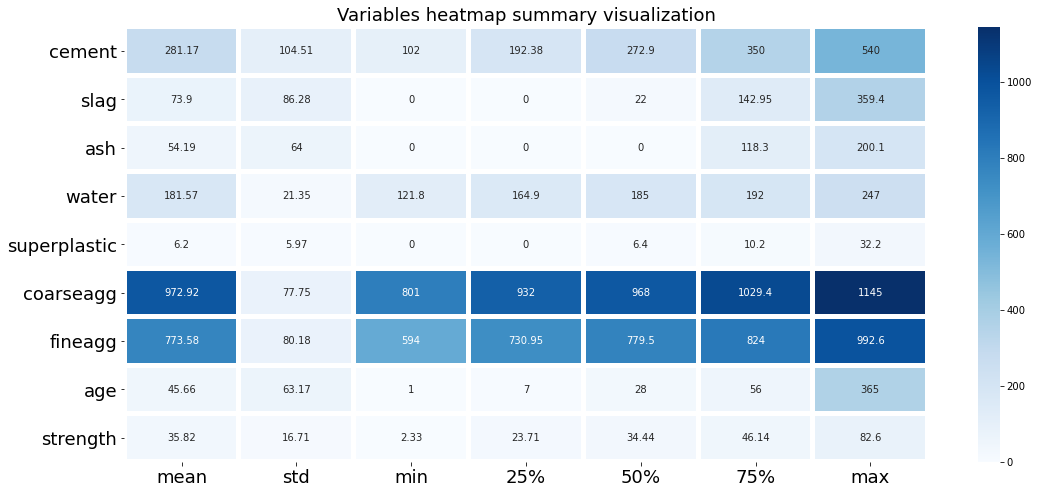

In [16]:
plt.figure(figsize=(18,8))
sns.heatmap(round(data.describe()[1:].transpose(),2),
            linewidth=4,annot=True,fmt="g",cmap='Blues')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Variables heatmap summary visualization",fontsize=18)
plt.show()

## OBSERVATIONS
From the above Table we can conclude that <b>slag, ash and age</b> variable have difference in mean and median(50%) values, where mean is bigger than  median indcating that there is a <b>right tailed skewness in data</b>.<br><br>
Moreover, <b>slag, ash  and superplastic</b> have as <b>minimum</b> value <b>zero (0)</b>, which cannot be in he composition of cement.<br><br>
Additionally <b>cement</b> where the <b>min value is 102 the std value 104</b> (pretty close) and finally the range of the values in this variable is 102 - 540, it obviously indicates that the close values of std and min needs further attention and examination, as by the theory we know that standard deviation can determine how spread out the data are from the mean. A <b>higher standard deviation value</b> indicates greater spread in the data. A good rule of thumb for a normal distribution is that approximately 68% of the values fall within one standard deviation of the mean, 95% of the values fall within two standard deviations, and 99.7% of the values fall within three standard deviations.Standard deviation can also be used to establish a benchmark for estimating the overall variation of a process.<br><br>
Similarly for  <b>Water variable</b>, the standard deviation is  smaller than the min value, so  we have to  consider this variable for further analysis<br><br>
Furthemore by observing the difference between ( Q1 & median ) and (Q3 & median) in columns <b>slag and ash</b> there is a  number of outliers</b>.<br><br>
Finally other columns has very little difference between ( Q1 &median ) and (Q3 & median), so there might be 1 or 2 outliers.<br><br>
In any case the data <b>does not contain any missing values or special symbols</b>, but it has <b>0 values</b> in few columns, <b>which is to be treated</b>.

## Cement¶

In [17]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
cwo=((data.iloc[:] <(q1-1.5*IQR))|(data.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
opdf=pd.DataFrame(cwo,index=data.columns,
                  columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(data),2)
opdf

No. of Outliers  Percentage Outliers
cement                      0                0.000
slag                        2                0.190
ash                         0                0.000
water                       9                0.870
superplastic               10                0.970
coarseagg                   0                0.000
fineagg                     5                0.490
age                        59                5.730
strength                    4                0.390

In [18]:
print('Range of values: ', data['cement'].max() - data['cement'].min())
#Central values 
print('Minimum age: ', data['cement'].min())
print('Maximum age: ',data['cement'].max())
print('Mean value: ', data['cement'].mean())
print('Median value: ',data['cement'].median())
print('Standard deviation: ', data['cement'].std())

#Quartiles
Q1=data['cement'].quantile(q=0.25)
Q3=data['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['cement']))
#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)


Range of values:  438.0
Minimum age:  102.0
Maximum age:  540.0
Mean value:  281.1678640776698
Median value:  272.9
Standard deviation:  104.50636449481536
1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625
Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [19]:
print('Number of outliers in cement upper : ', data[data['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', data[data['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(data[data['cement']>586.4375]['cement'].count()*100/len(data)), '%')
print('% of Outlier in cement lower: ',round(data[data['cement']<-44.0625]['cement'].count()*100/len(data)), '%')

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0.0 %
% of Outlier in cement lower:  0.0 %


## Slag

In [20]:
print('Range of values: ', data['slag'].max() - data['slag'].min())
#Central values 
print('Minimum age: ', data['slag'].min())
print('Maximum age: ',data['slag'].max())
print('Mean value: ', data['slag'].mean())
print('Median value: ',data['slag'].median())
print('Standard deviation: ', data['slag'].std())

#Quartiles
Q1=data['slag'].quantile(q=0.25)
Q3=data['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['slag']))
#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)


Range of values:  359.4
Minimum age:  0.0
Maximum age:  359.4
Mean value:  73.89582524271844
Median value:  22.0
Standard deviation:  86.2793417481054
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95
Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375


In [21]:
print('Number of outliers in slag upper : ', data[data['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', data[data['slag']<-214.4249]['slag'].count())
print('% of Outlier in slag upper: ',round(data[data['slag']>357.375]['slag'].count()*100/len(data)), '%')
print('% of Outlier in slag lower: ',round(data[data['slag']<-214.4249]['slag'].count()*100/len(data)), '%')


Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0.0 %
% of Outlier in slag lower:  0.0 %


## Ash

In [22]:
print('Range of values: ', data['ash'].max() - data['ash'].min())
#Central values 
print('Minimum age: ', data['ash'].min())
print('Maximum age: ',data['ash'].max())
print('Mean value: ', data['ash'].mean())
print('Median value: ',data['ash'].median())
print('Standard deviation: ', data['ash'].std())

#Quartiles
Q1=data['ash'].quantile(q=0.25)
Q3=data['ash'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['ash']))
#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)


Range of values:  200.1
Minimum age:  0.0
Maximum age:  200.1
Mean value:  54.188349514563086
Median value:  0.0
Standard deviation:  63.99700415268794
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3
Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [23]:
print('Number of outliers in ash upper : ', data[data['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower : ', data[data['ash']<-177.45]['ash'].count())
print('% of Outlier in ash upper: ',round(data[data['ash']>295.75]['ash'].count()*100/len(data)), '%')
print('% of Outlier in ash lower: ',round(data[data['ash']<-177.45]['ash'].count()*100/len(data)), '%')



Number of outliers in ash upper :  0
Number of outliers in ash lower :  0
% of Outlier in ash upper:  0.0 %
% of Outlier in ash lower:  0.0 %


## Water

In [24]:
print('Range of values: ', data['water'].max() - data['water'].min())
#Central values 
print('Minimum age: ', data['water'].min())
print('Maximum age: ',data['water'].max())
print('Mean value: ', data['water'].mean())
print('Median value: ',data['water'].median())
print('Standard deviation: ', data['water'].std())

#Quartiles
Q1=data['water'].quantile(q=0.25)
Q3=data['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['water']))
#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)

Range of values:  125.2
Minimum age:  121.8
Maximum age:  247.0
Mean value:  181.56728155339798
Median value:  185.0
Standard deviation:  21.35421856503245
1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994
Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


In [25]:
print('Number of outliers in water upper : ', data[data['water']>232.6499]['water'].count())
print('Number of outliers in water lower : ', data[data['water']<-124.25]['water'].count())
print('% of Outlier in water upper: ',round(data[data['water']>232.6499]['water'].count()*100/len(data)), '%')
print('% of Outlier in water lower: ',round(data[data['water']<-124.25]['water'].count()*100/len(data)), '%')


Number of outliers in water upper :  4
Number of outliers in water lower :  0
% of Outlier in water upper:  0.0 %
% of Outlier in water lower:  0.0 %


## Superplastic

In [26]:
print('Range of values: ', data['superplastic'].max() - data['superplastic'].min())
#Central values 
print('Minimum age: ', data['superplastic'].min())
print('Maximum age: ',data['superplastic'].max())
print('Mean value: ', data['superplastic'].mean())
print('Median value: ',data['superplastic'].median())
print('Standard deviation: ', data['superplastic'].std())

#Quartiles
Q1=data['superplastic'].quantile(q=0.25)
Q3=data['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['superplastic']))
#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)


Range of values:  32.2
Minimum age:  0.0
Maximum age:  32.2
Mean value:  6.204660194174756
Median value:  6.4
Standard deviation:  5.973841392485508
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2
Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5


In [27]:

print('Number of outliers in superplastic upper : ', data[data['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', data[data['superplastic']<-15.2999]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(data[data['superplastic']>25.5]['superplastic'].count()*100/len(data)), '%')
print('% of Outlier in superplastic lower: ',round(data[data['superplastic']<-15.2999]['superplastic'].count()*100/len(data)), '%')


Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1.0 %
% of Outlier in superplastic lower:  0.0 %


## Coarsagg

In [28]:
print('Range of values: ', data['coarseagg'].max() - data['coarseagg'].min())
#Central values 
print('Minimum age: ', data['coarseagg'].min())
print('Maximum age: ',data['coarseagg'].max())
print('Mean value: ', data['coarseagg'].mean())
print('Median value: ',data['coarseagg'].median())
print('Standard deviation: ', data['coarseagg'].std())
#Quartiles
Q1=data['coarseagg'].quantile(q=0.25)
Q3=data['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['coarseagg']))
#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)

Range of values:  344.0
Minimum age:  801.0
Maximum age:  1145.0
Mean value:  972.918932038835
Median value:  968.0
Standard deviation:  77.75395396672087
1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009
Lower outliers in coarseagg:  785.8999999999999
Upper outliers in coarseagg:  1175.5000000000002


In [29]:
print('Number of outliers in coarseagg upper : ', data[data['coarseagg']>1175.5000]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', data[data['coarseagg']<785.8999]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(data[data['coarseagg']>1175.5000]['coarseagg'].count()*100/len(data)), '%')
print('% of Outlier in coarseagg lower: ',round(data[data['coarseagg']<785.8999]['coarseagg'].count()*100/len(data)), '%')


Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0.0 %
% of Outlier in coarseagg lower:  0.0 %


## Fineagg

In [30]:
print('Range of values: ', data['fineagg'].max() - data['fineagg'].min())
#Central values 
print('Minimum age: ', data['fineagg'].min())
print('Maximum age: ',data['fineagg'].max())
print('Mean value: ', data['fineagg'].mean())
print('Median value: ',data['fineagg'].median())
print('Standard deviation: ', data['fineagg'].std())
#Quartiles
Q1=data['fineagg'].quantile(q=0.25)
Q3=data['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['fineagg']))
#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)


Range of values:  398.6
Minimum age:  594.0
Maximum age:  992.6
Mean value:  773.5804854368932
Median value:  779.5
Standard deviation:  80.17598014240443
1st Quartile (Q1) is:  730.9499999999999
3st Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.05000000000007
Lower outliers in fineagg:  591.3749999999998
Upper outliers in fineagg:  963.575


In [31]:
print('Number of outliers in fineagg upper : ', data[data['fineagg']>963.575]['fineagg'].count())
print('Number of outliers in fineagg lower : ', data[data['fineagg']<591.3749]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(data[data['fineagg']>963.575]['fineagg'].count()*100/len(data)), '%')
print('% of Outlier in fineagg lower: ',round(data[data['fineagg']<591.3749]['fineagg'].count()*100/len(data)), '%')


Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0.0 %
% of Outlier in fineagg lower:  0.0 %


## Age

In [32]:
print('Range of values: ', data['age'].max() - data['age'].min())
#Central values 
print('Minimum age: ', data['age'].min())
print('Maximum age: ',data['age'].max())
print('Mean value: ', data['age'].mean())
print('Median value: ',data['age'].median())
print('Standard deviation: ', data['age'].std())
#Quartiles
Q1=data['age'].quantile(q=0.25)
Q3=data['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['age']))
#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)


Range of values:  364
Minimum age:  1
Maximum age:  365
Mean value:  45.662135922330094
Median value:  28.0
Standard deviation:  63.16991158103279
1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0
Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [33]:
print('Number of outliers in age upper : ', data[data['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', data[data['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(data[data['age']>129.55]['age'].count()*100/len(data)), '%')
print('% of Outlier in age lower: ',round(data[data['age']<-66.5]['age'].count()*100/len(data)), '%')


Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6.0 %
% of Outlier in age lower:  0.0 %


## Surface plot for variables
X - Axis = columns encoded as coarseagg : 1, fineagg : 2,
cement : 3, ash : 4, water : 5, slag:6, superplastic : 7, strength : 8, age : 9]<br>
Y - Axis = index.<br>
Z - Axis = values .

In [34]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

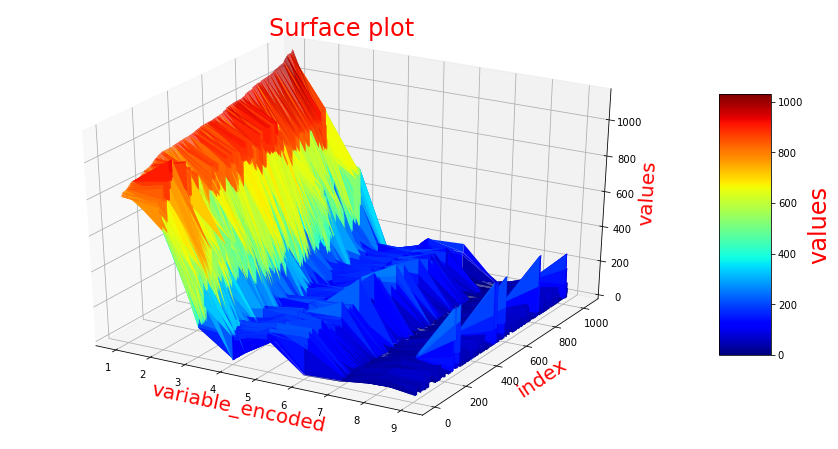

In [35]:
data  = data.sort_values(by=['coarseagg'],
                                         ascending=True).reset_index()

data  = data [['cement', 'slag', 'ash', 'water', 'superplastic',
               'coarseagg', 'fineagg', 'age', 'strength']] 

df = data.unstack().reset_index()
df.columns = ["X","Y","Z"]
df["X"] = df["X"].map({'coarseagg':1, 'fineagg':2 , 
                       'cement':3, 'slag':6, 'ash':4,
                       'water':5, 'superplastic':7,
                        'age':9, 'strength':8})
 
fig = plt.figure(figsize=(15,8))
ax  = fig.gca(projection = "3d")

surf = ax.plot_trisurf(df["X"],df["Y"],df["Z"],cmap="jet",linewidth=2)
lab  = fig.colorbar(surf,shrink=.6,aspect=5)
lab.set_label("values",fontsize=24,color="red")

ax.set_xlabel("variable_encoded",fontsize=20,color="red")
ax.set_ylabel("index",fontsize=20,color="red")
ax.set_zlabel("values",fontsize=20,color="red")

plt.title("Surface plot",color="red",fontsize=24)
plt.show()

## Distribution Pots for variables

Ploting the distribution of the independent Variables and the respective mean of each one in the same plot

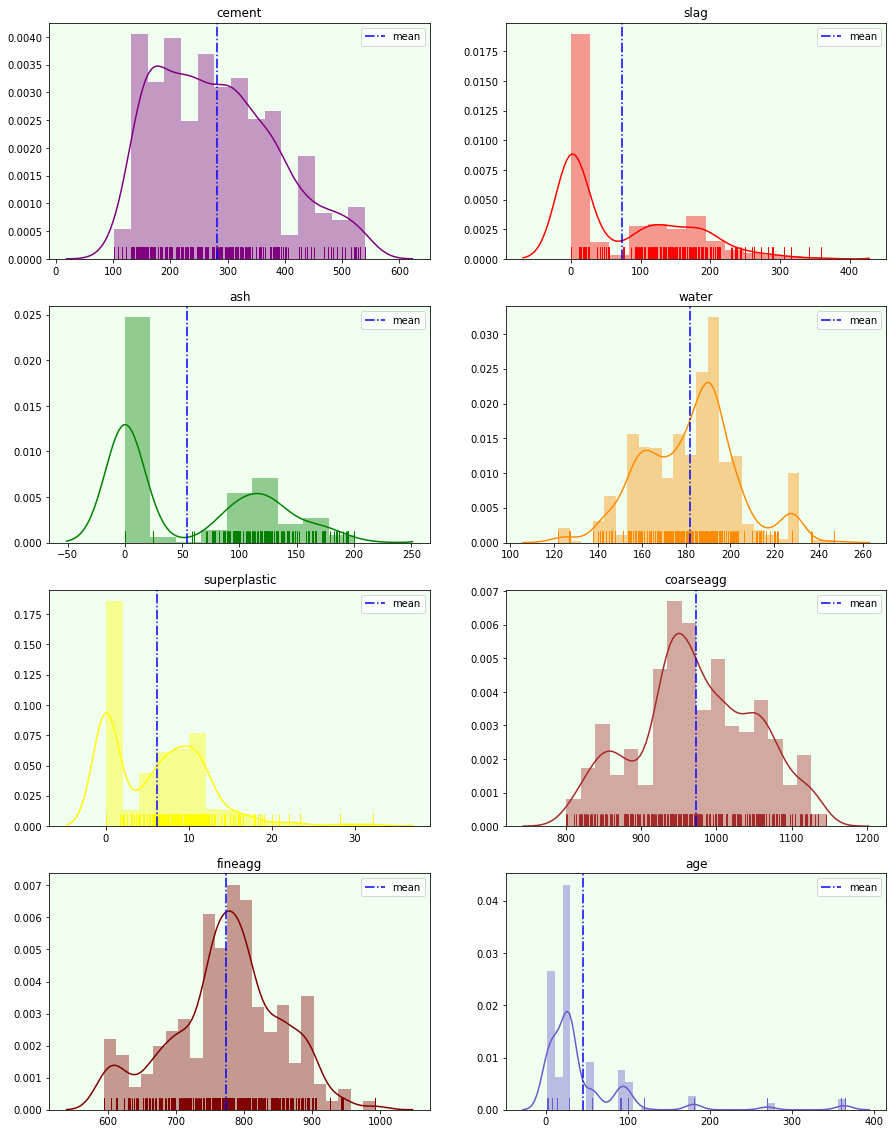

In [36]:
cols = [i for i in data.columns if i not in 'strength']
length = len(cols)
cs = ["purple","red","green","darkorange","yellow","brown","maroon","slateblue"]
fig = plt.figure(figsize=(15,20),edgecolor='black')

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(data[i],color=k,rug=True)
    ax.set_facecolor("honeydew")
    plt.axvline(data[i].mean(),linestyle="dashdot",label="mean",color="b")
    plt.legend(loc="best")
    plt.title(i,color="black")
    plt.xlabel("")

In [37]:
# Let us check the skewness values quantitatively:
print("Cement-Skewness = ",data['cement'].skew())
print("Slag-Skewness = ",data['slag'].skew())
print("Water-Skewness = ",data['water'].skew())
print("Superplastic-Skewness = ",data['superplastic'].skew())
print("Coarsagg-Skewness = ",data['coarseagg'].skew())
print("Fineagg-Skewness = ",data['fineagg'].skew())
print("Age-Skewness = ",data['age'].skew())

Cement-Skewness =  0.5094811788717731
Slag-Skewness =  0.8007168956061769
Water-Skewness =  0.07462838428549401
Superplastic-Skewness =  0.9072025748672465
Coarsagg-Skewness =  -0.04021974481106721
Fineagg-Skewness =  -0.25300959769707565
Age-Skewness =  3.2691774006345904


## Observation for the variables
The data is almost normally distributed with some skewness in few atrributes which may be due to the presence of outliers.Distribition of most of the columns show positive skewness (long right tail) <br>
Disributions of attributes namely age, ash, slag and superplastic show high skewness<br>
Disribution of cement attribute shows moderate skewness<br>
Distributions of coarseagg, fineagg and water look normally distributed<br>
The skewness values show agreement with our qualitative analysis of the distribution plot shown above
Water and coarseag have approximately symmetric distributions <br>
Attributes coarseagg and fineagg show negative skewness <br>


## strength distribution- the target Variable 

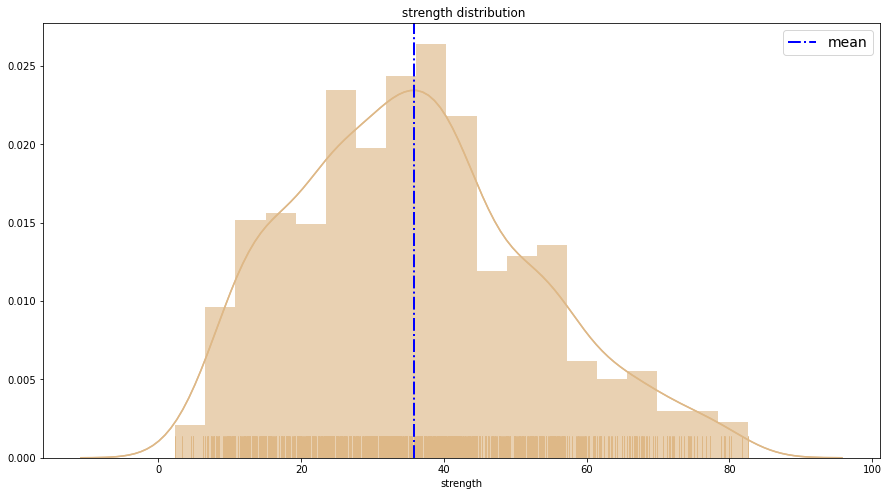

In [38]:
fig = plt.figure(figsize=(15,8),edgecolor='black')
sns.distplot(data["strength"],color="burlywood",rug=True)
sns.distplot(data["strength"],color="burlywood",rug=True)
plt.axvline(data["strength"].mean(),
            linestyle='dashdot',color="b",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title(" strength distribution")
plt.show()

In [39]:
# Let us check the skewness:
print("Skewness = ",data['strength'].skew())

Skewness =  0.416977288410718


## Observation for target variable
The values of the target variable seems quite balanced<br>
It is positively, lightly skewed, as the skew value is < 0.5. For analysis, we can log transform this variable for better analysis, optional.

## Identifying outliers with boxpot 

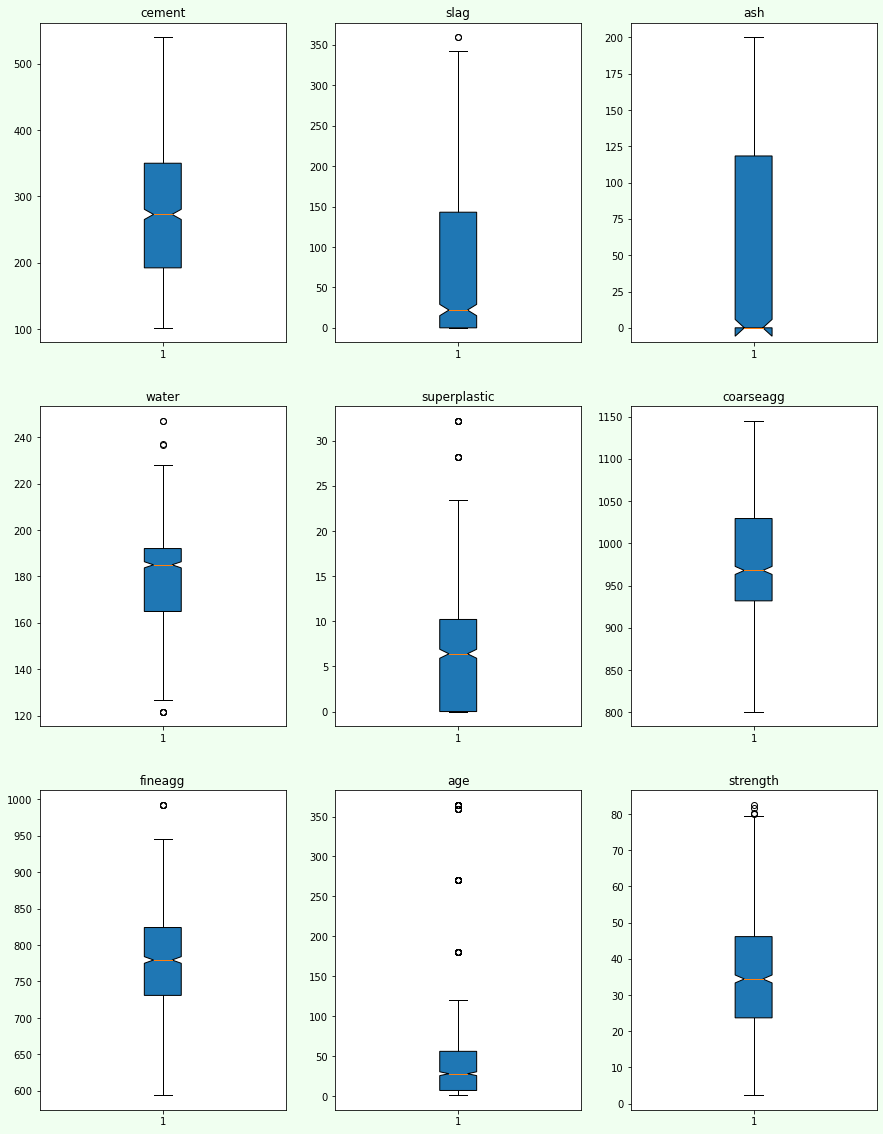

In [40]:
fig, axs = plt.subplots(3, 3, figsize = (15,20))
fig.set_facecolor("honeydew")

axs[0, 0].boxplot(data.cement,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True) # fill with color 
axs[0, 0].set_title('cement')

axs[0, 1].boxplot(data.slag,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                        patch_artist=True) # fill with color
axs[0, 1].set_title('slag')

axs[0, 2].boxplot(data.ash,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True) # fill with color)
axs[0, 2].set_title('ash')

axs[1, 0].boxplot(data.water,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True) # fill with color)
axs[1, 0].set_title('water')

axs[1, 1].boxplot(data['superplastic'],notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True) # fill with color)
axs[1, 1].set_title('superplastic')

axs[1, 2].boxplot(data['coarseagg'],notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True) # fill with color)
axs[1, 2].set_title('coarseagg')

axs[2, 0].boxplot(data.fineagg,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True) # fill with color
axs[2, 0].set_title('fineagg')

axs[2, 1].boxplot(data.age,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True) # fill with color
axs[2, 1].set_title('age')

axs[2, 2].boxplot(data.strength,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True) # fill with color
axs[2, 2].set_title('strength')

plt.show()

## Observation about outliers
Except the attribute ash, others are more or less normally distributed with few outliers<br>
Age column appears to be having maximum number of outliers<br>
Slag, Water, superplastic, fineagg features have some outliers<br>
All features except age and strength have same units(kg in m3 mixture) but have different scales. <br>
Thus we might need to scale the data so as to avoid bias in algorithms

In [41]:
#Binning days to months
data_age=data.copy()
def label(data_age):
    if data_age["age"] <= 30:
        return "1 month"
    if data_age["age"] > 30 and data_age["age"] <= 60 :
        return "2 months"
    if data_age["age"] > 60 and data_age["age"] <= 90 :
        return "3 months"
    if data_age["age"] > 90 and data_age["age"] <= 120 :
        return "4 months"
    if data_age["age"] > 120 and data_age["age"] <= 150 :
        return "5 months"
    if data_age["age"] > 150 and data_age["age"] <= 180 :
        return "6 months"
    if data_age["age"] > 180 and data_age["age"] <= 210 :
        return "7 months"
    if data_age["age"] > 210 and data_age["age"] <= 240 :
        return "8 months"
    if data_age["age"] > 240 and data_age["age"] <= 270 :
        return "9 months"
    if data_age["age"] > 270 and data_age["age"] <= 300 :
        return "10 months"
    if data_age["age"] > 300 and data_age["age"] <= 330 :
        return "11 months"
    if data_age["age"] > 330 :
        return "12 months"
data_age["age_months"] = data_age.apply(lambda data_age:label(data_age) , axis=1)

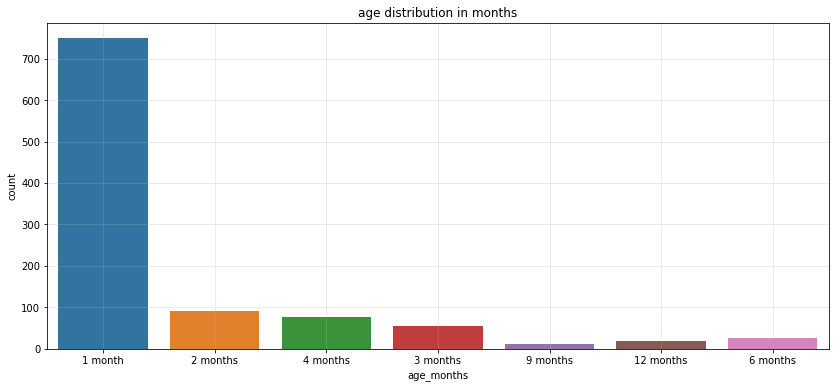

In [43]:
plt.figure(figsize=(14,6))
order = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
ax = sns.countplot(data_age["age_months"])
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()

## Observations
Different <b>types of concrete grades</b> available and usually used are M7,M7.5,M10,M15,M20,M725,M30,M35,M40,M45,M50,M55,M60,M65,M70<br>
It essentially means at 28 days time <b>the strength</b> should be 7MPa for M7 and 70MPa for M70.<br>
However we can see <b>lots of grades of concrete</b>. This could be due to variation in other contents of the concrete.<br>

# Bi-variate analysis

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRYwBprCz2fX-9ds0xD7st4JNfl95RVXZJGPA&usqp=CAU">

between the <b>predictor variables  and target column</b>. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. (10 marks)

## Pair plot between variables

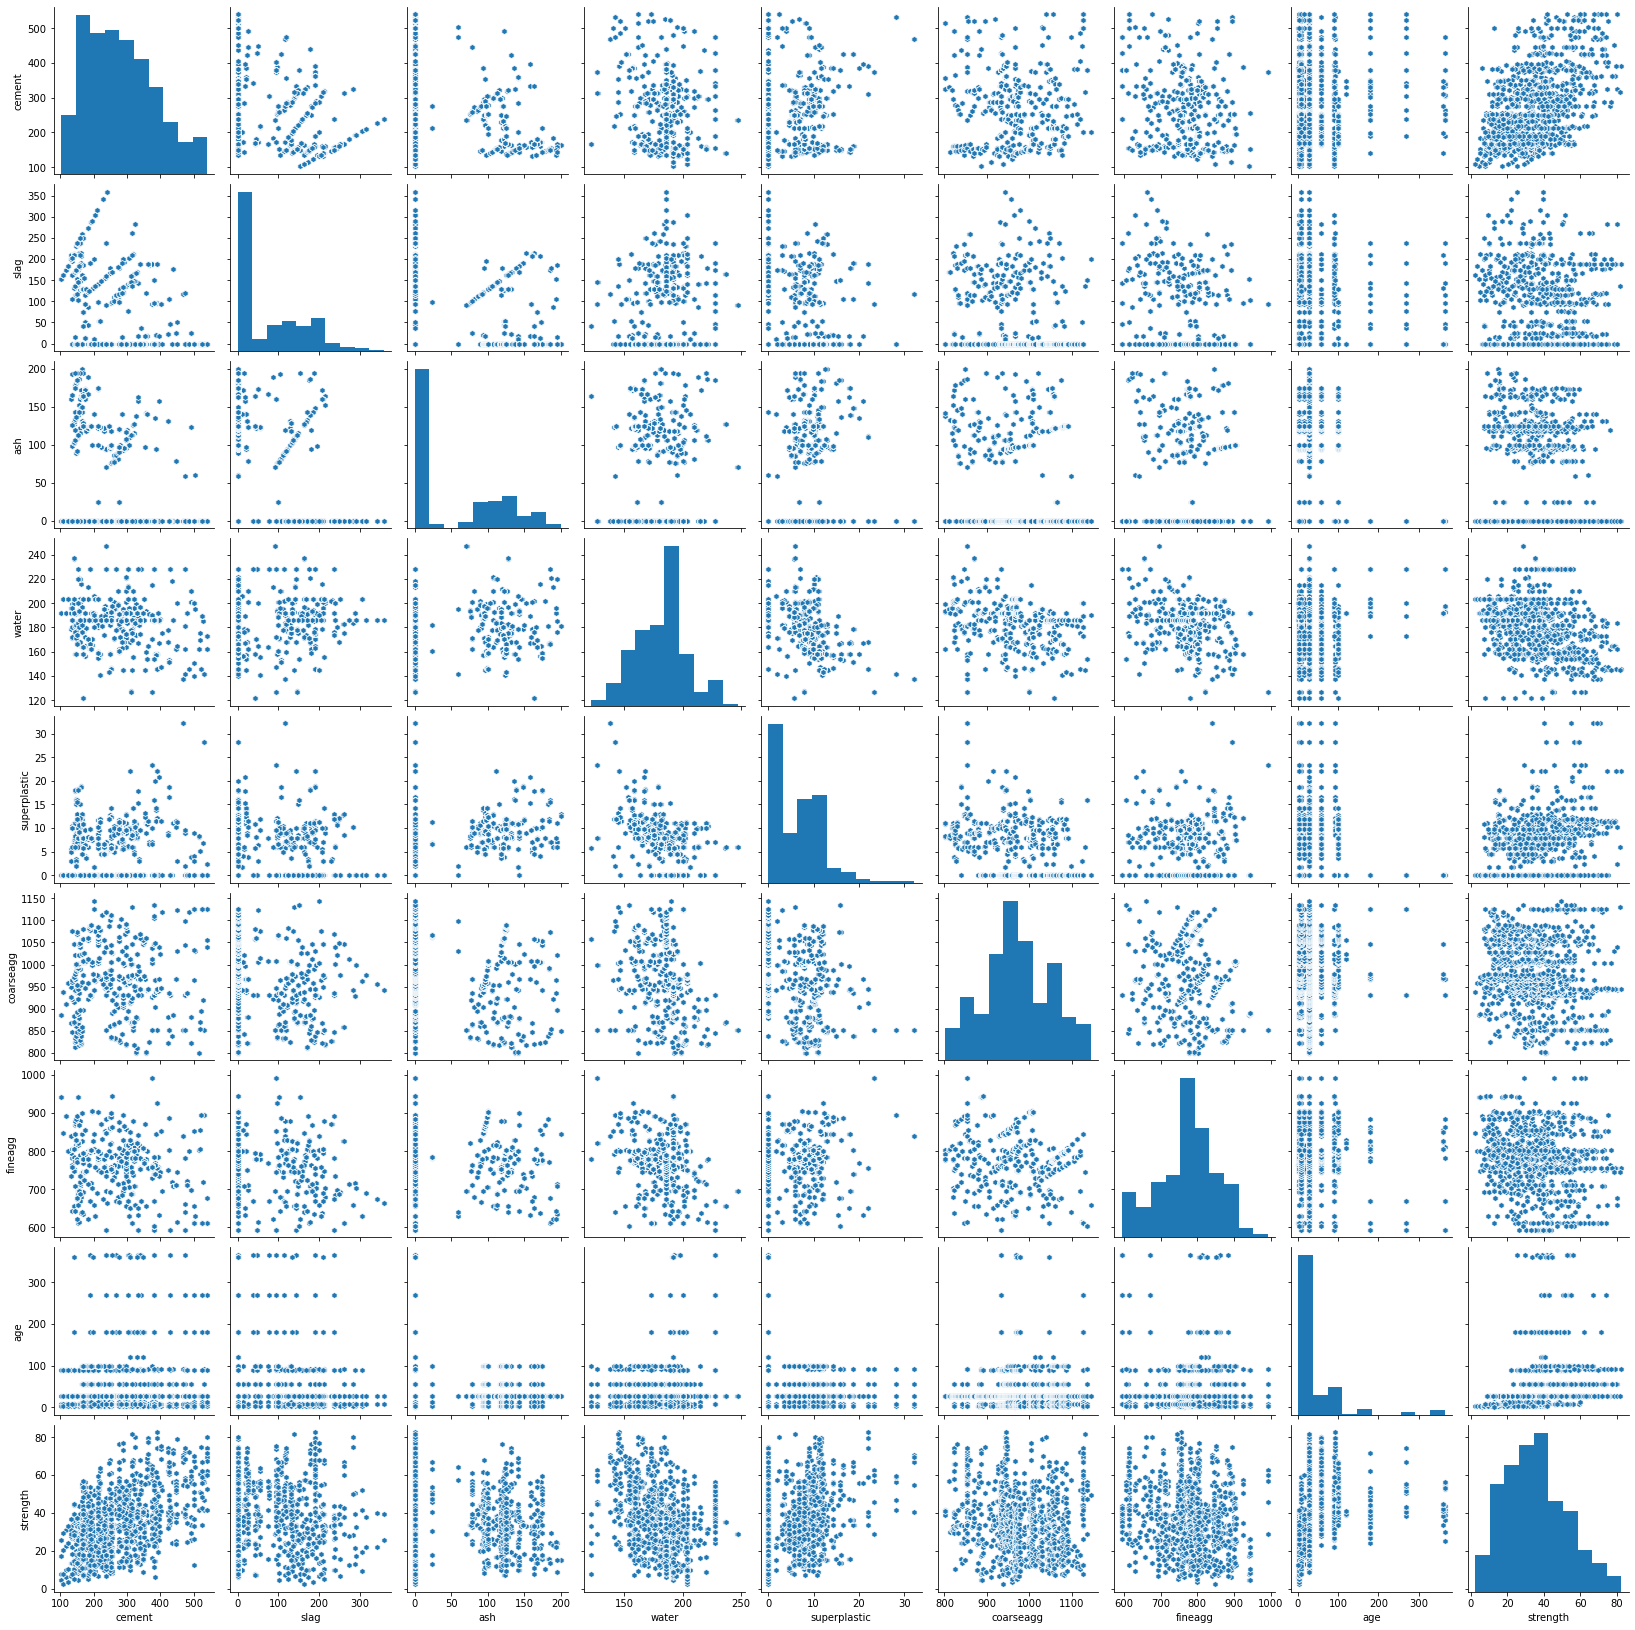

In [44]:
sns.pairplot(data,markers="h")
plt.show()

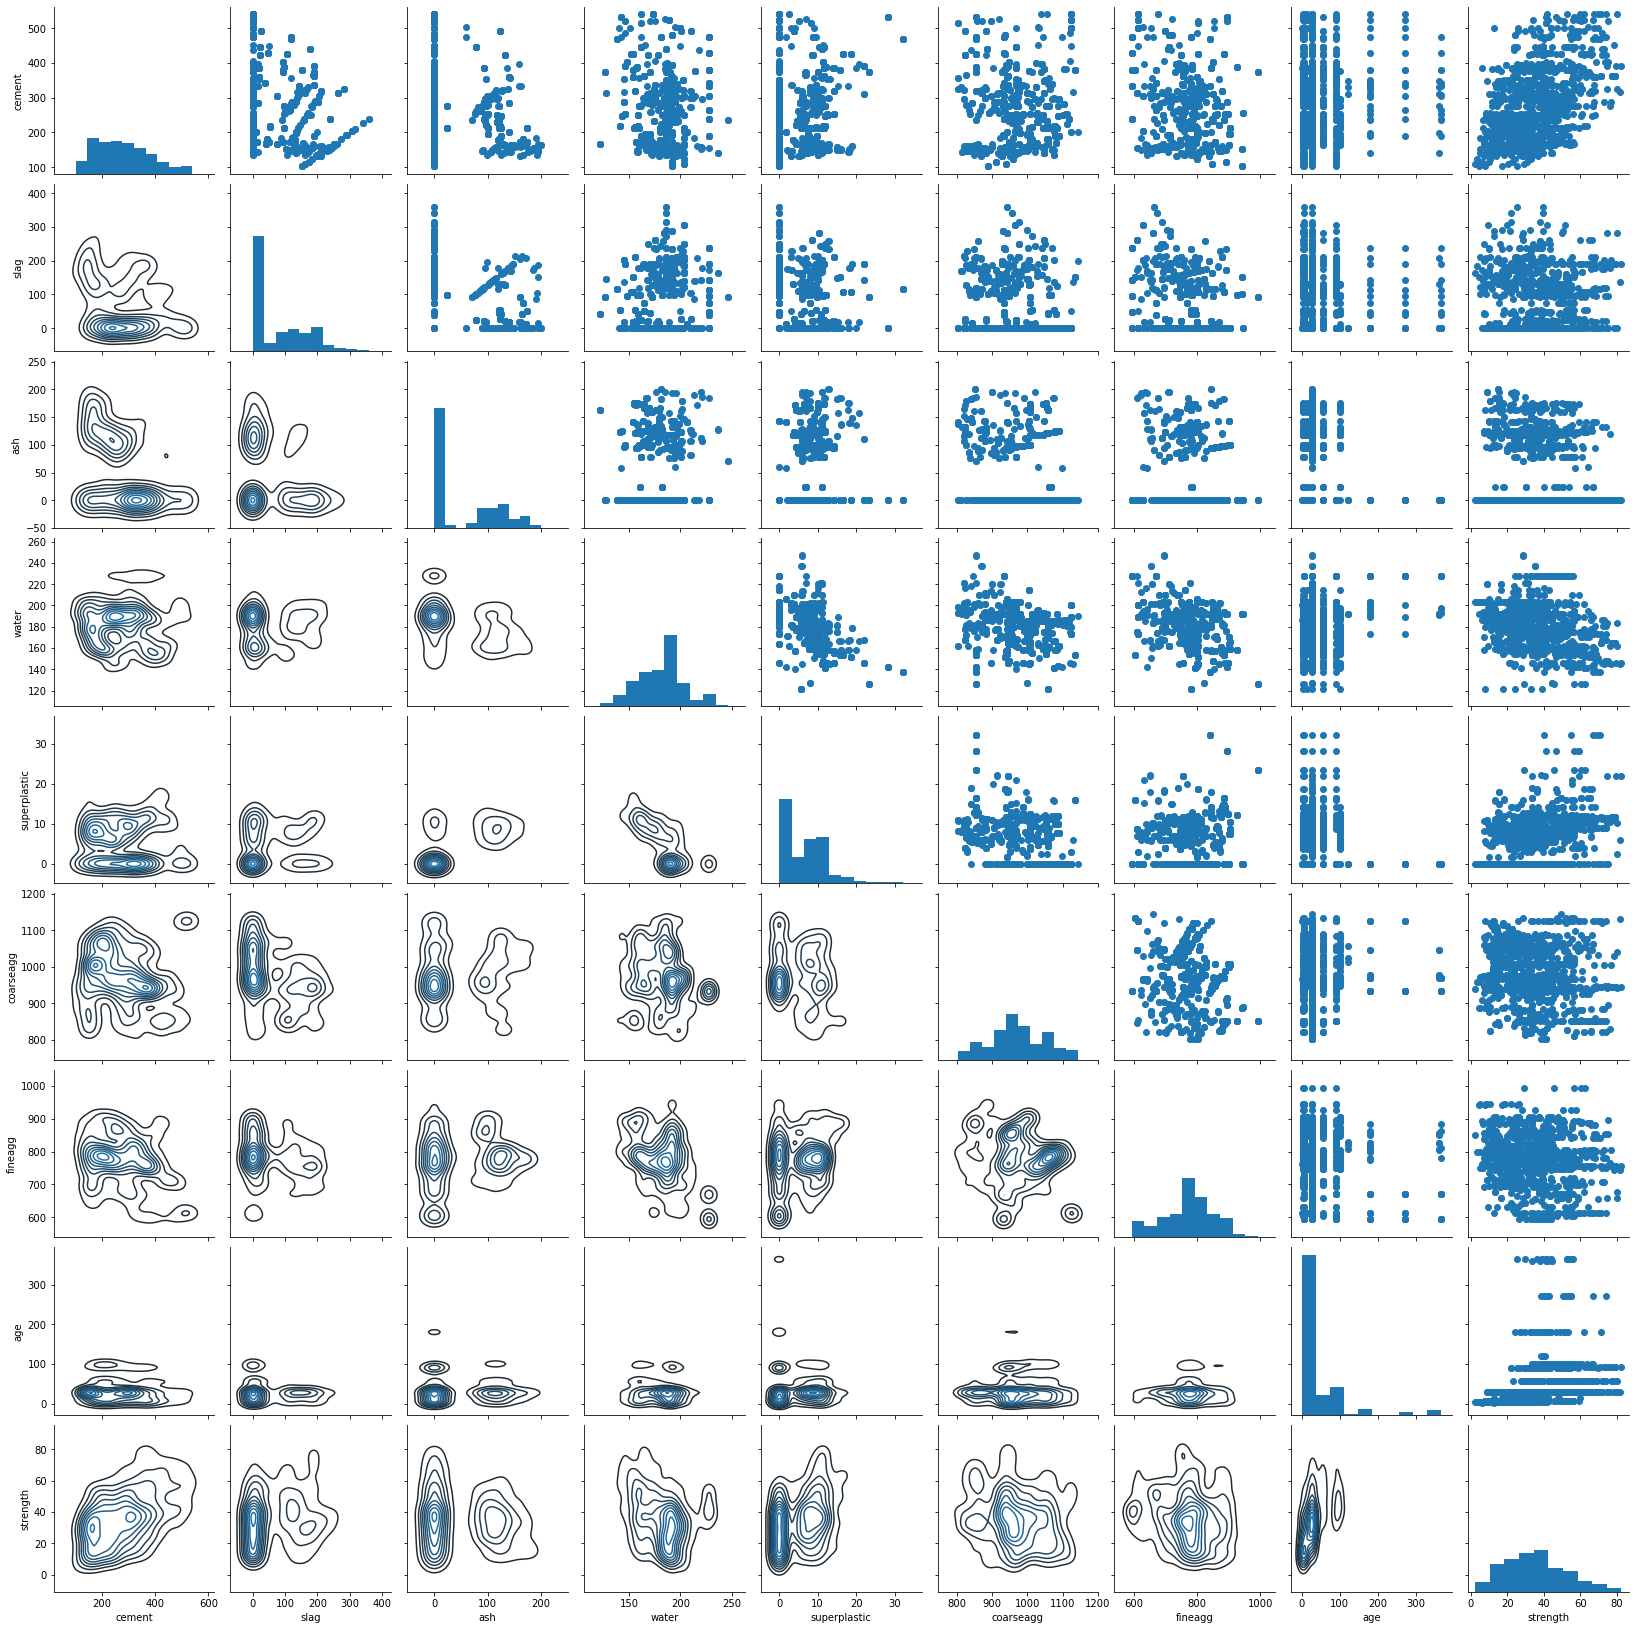

In [45]:
g = sns.PairGrid(data)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## Correlations 

In [46]:
cor = data.corr()
cor

cement   slag    ash  water  superplastic  coarseagg  fineagg  \
cement         1.000 -0.275 -0.397 -0.082         0.092     -0.109   -0.223   
slag          -0.275  1.000 -0.324  0.107         0.043     -0.284   -0.282   
ash           -0.397 -0.324  1.000 -0.257         0.378     -0.010    0.079   
water         -0.082  0.107 -0.257  1.000        -0.658     -0.182   -0.451   
superplastic   0.092  0.043  0.378 -0.658         1.000     -0.266    0.223   
coarseagg     -0.109 -0.284 -0.010 -0.182        -0.266      1.000   -0.178   
fineagg       -0.223 -0.282  0.079 -0.451         0.223     -0.178    1.000   
age            0.082 -0.044 -0.154  0.278        -0.193     -0.003   -0.156   
strength       0.498  0.135 -0.106 -0.290         0.366     -0.165   -0.167   

                age  strength  
cement        0.082     0.498  
slag         -0.044     0.135  
ash          -0.154    -0.106  
water         0.278    -0.290  
superplastic -0.193     0.366  
coarseagg    -0.003    -0.165  
fineagg      -0.156    -0.167  
age           1.000     0.329  
strength      0.329     1.000

## Heat map 

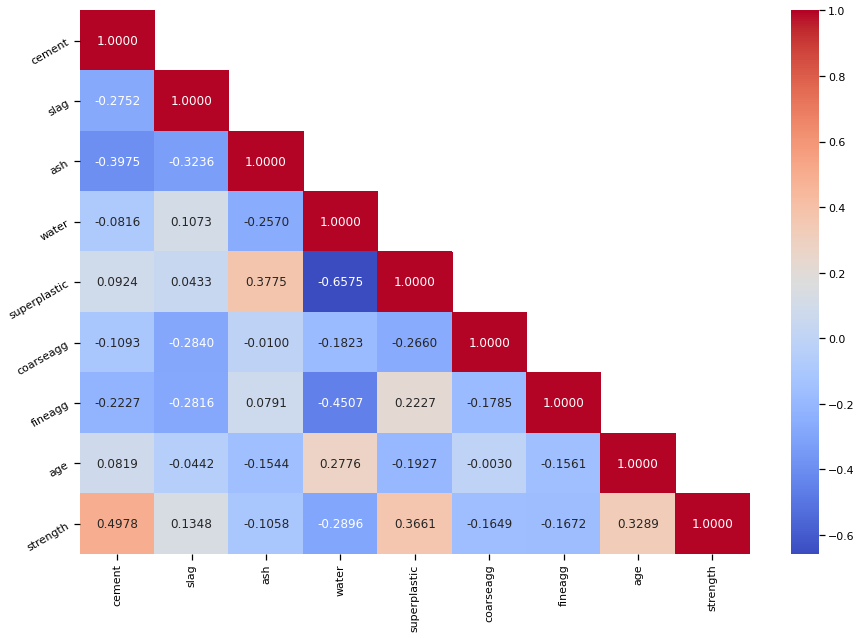

In [47]:
# See the correlation in graphical representation
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(15,10))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, cmap="coolwarm", annot=True, fmt='.4f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Scatterplots between Variable with the Target Variable

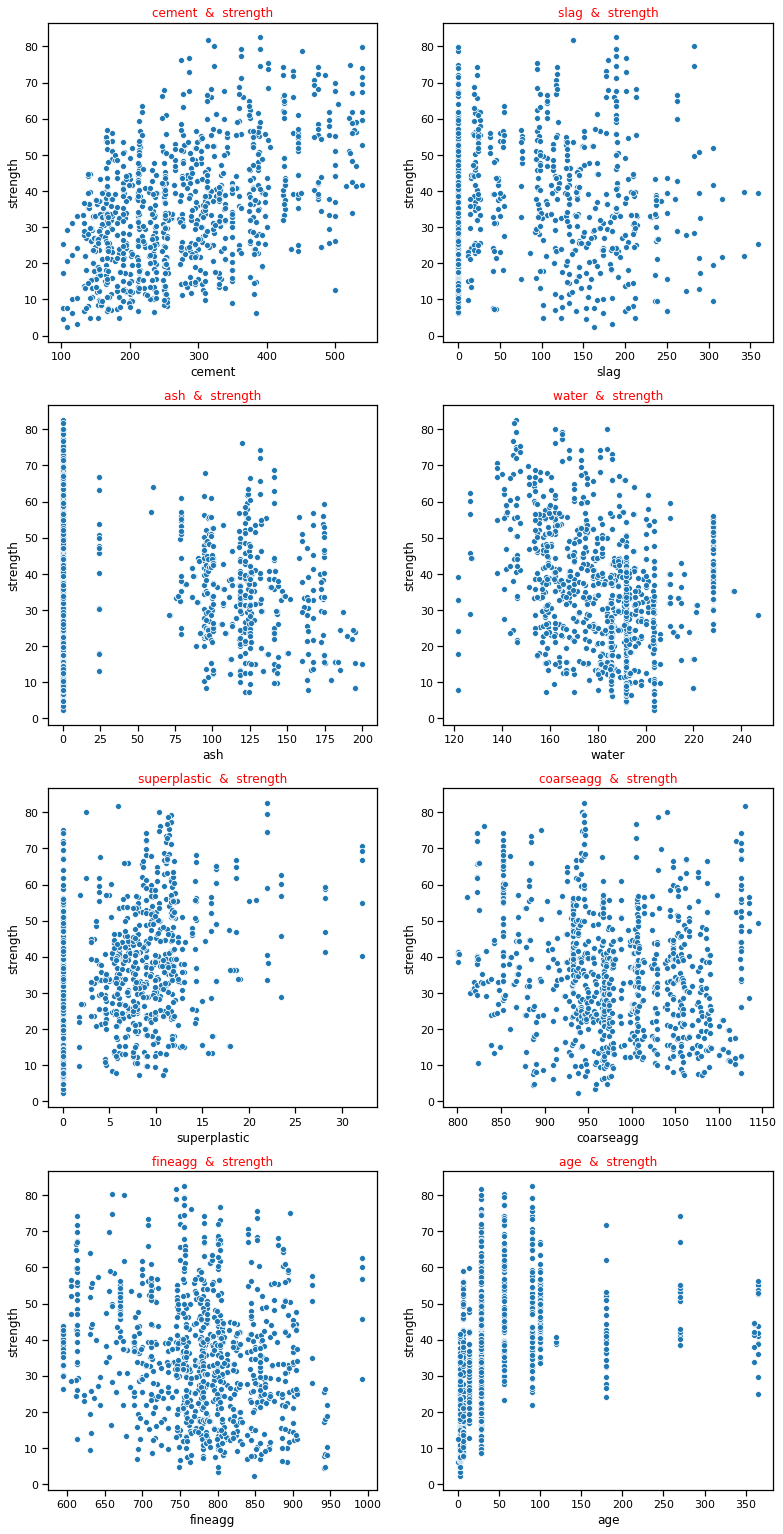

In [48]:
cols = [i for i in data.columns if i not in 'strength']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.scatterplot(data[i], data["strength"])
    plt.title(i+"  &  strength",color="red")

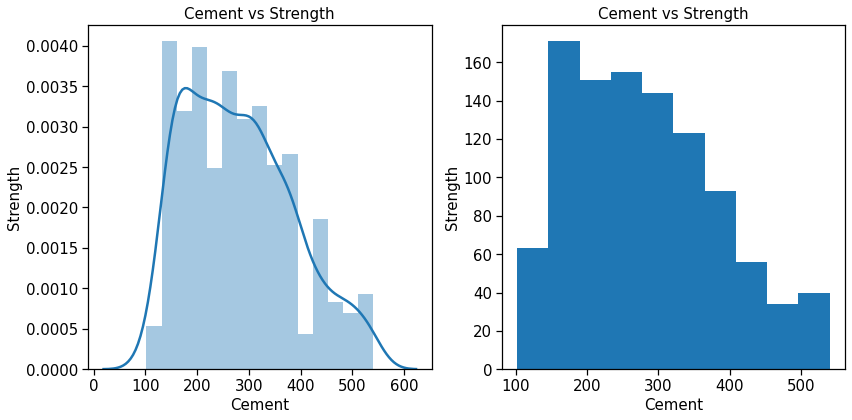

In [49]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

#distplot
sns.distplot(data['cement'],ax=ax1)
ax1.set_xlabel('Cement', fontsize=15)
ax1.set_ylabel('Strength', fontsize=15)
ax1.set_title('Cement vs Strength', fontsize=15)
ax1.tick_params(labelsize=15)

#histogram
ax2.hist(data['cement'])
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


<Figure size 864x432 with 0 Axes>

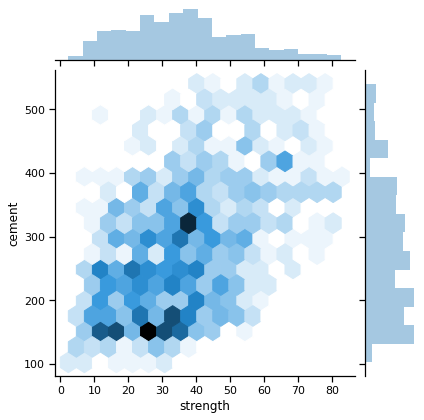

In [50]:
#joinplot
plt.figure(figsize=(12,6))
sns.jointplot(data["strength"], data["cement"], kind="hex")

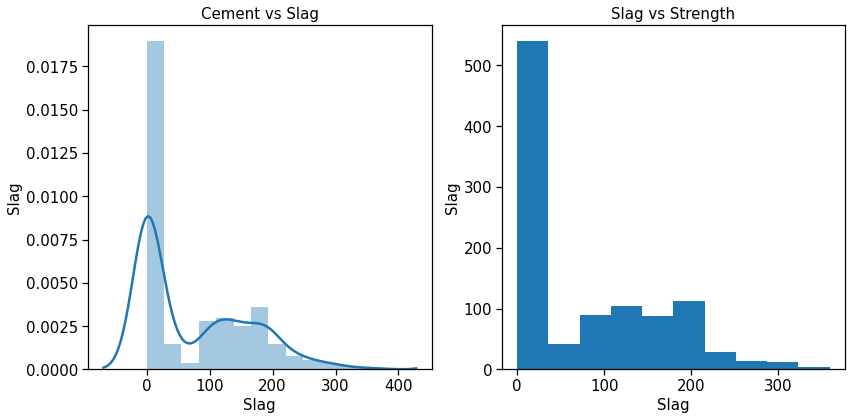

In [51]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

#distplot
sns.distplot(data['slag'],ax=ax1)
ax1.set_xlabel('Slag', fontsize=15)
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Cement vs Slag', fontsize=15)
ax1.tick_params(labelsize=15)

#histogram
ax2.hist(data['slag'])
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_ylabel('Slag', fontsize=15)
ax2.set_title('Slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

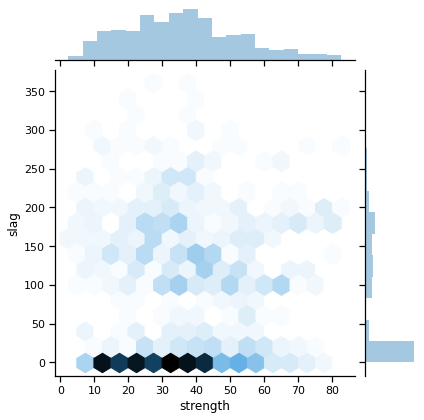

In [52]:
plt.figure(figsize=(12,6))
sns.jointplot(data["strength"], data["slag"], kind="hex")

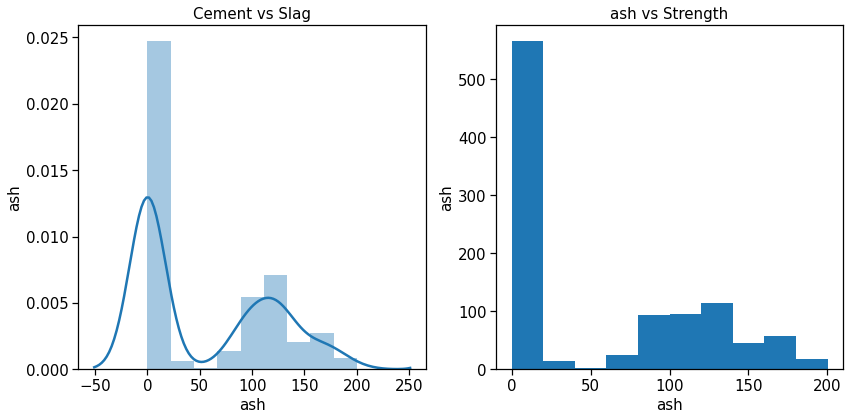

In [53]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

#distplot
sns.distplot(data['ash'],ax=ax1)
ax1.set_xlabel('ash', fontsize=15)
ax1.set_ylabel('ash', fontsize=15)
ax1.set_title('Cement vs Slag', fontsize=15)
ax1.tick_params(labelsize=15)

#histogram
ax2.hist(data['ash'])
ax2.set_xlabel('ash', fontsize=15)
ax2.set_ylabel('ash', fontsize=15)
ax2.set_title('ash vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

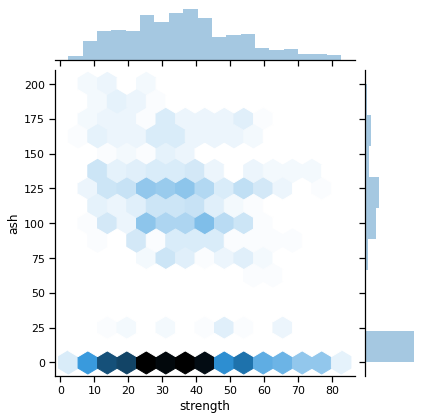

In [54]:
plt.figure(figsize=(12,6))
sns.jointplot(data["strength"], data["ash"], kind="hex")

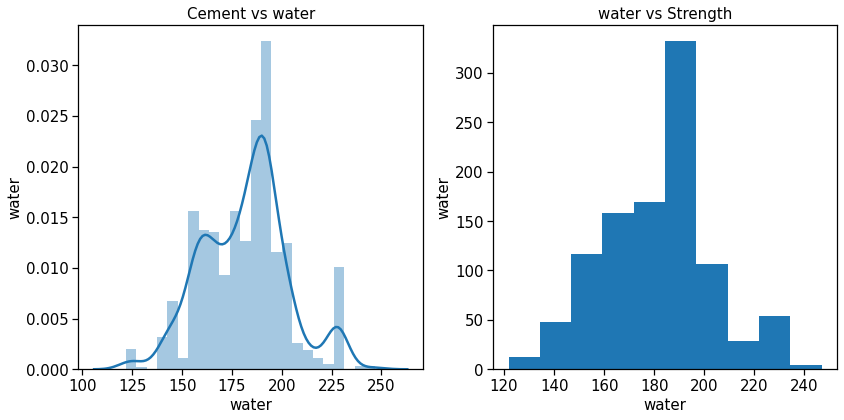

In [55]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

#distplot
sns.distplot(data['water'],ax=ax1)
ax1.set_xlabel('water', fontsize=15)
ax1.set_ylabel('water', fontsize=15)
ax1.set_title('Cement vs water', fontsize=15)
ax1.tick_params(labelsize=15)

#histogram
ax2.hist(data['water'])
ax2.set_xlabel('water', fontsize=15)
ax2.set_ylabel('water', fontsize=15)
ax2.set_title('water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

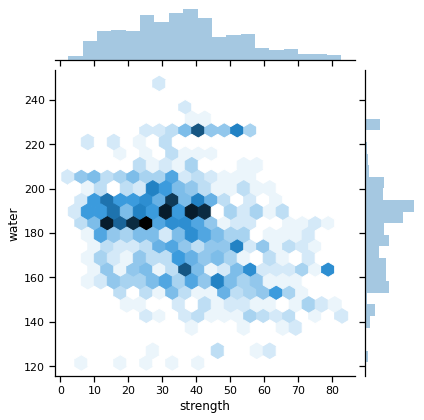

In [56]:
plt.figure(figsize=(12,6))
sns.jointplot(data["strength"], data["water"], kind="hex")

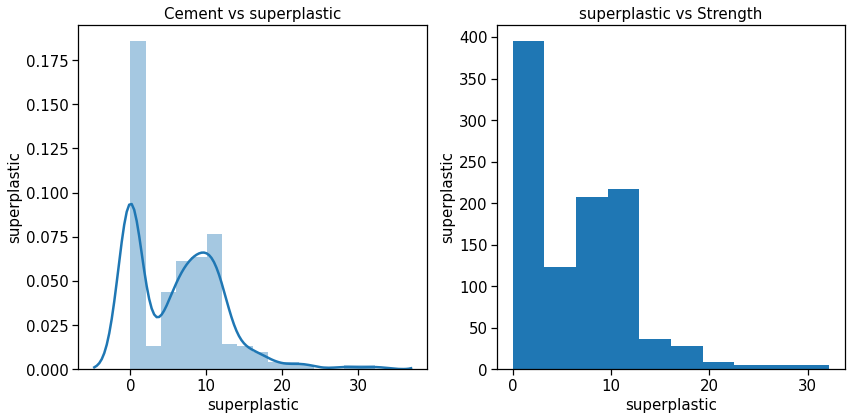

In [57]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

#distplot
sns.distplot(data['superplastic'],ax=ax1)
ax1.set_xlabel('superplastic', fontsize=15)
ax1.set_ylabel('superplastic', fontsize=15)
ax1.set_title('Cement vs superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#histogram
ax2.hist(data['superplastic'])
ax2.set_xlabel('superplastic', fontsize=15)
ax2.set_ylabel('superplastic', fontsize=15)
ax2.set_title('superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

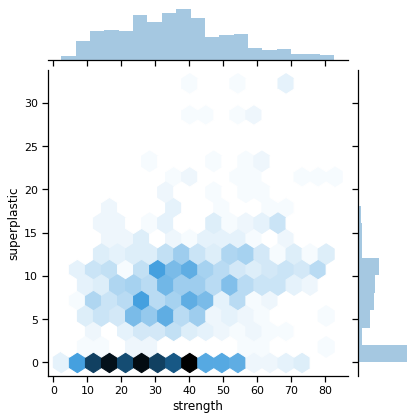

In [58]:
plt.figure(figsize=(12,6))
sns.jointplot(data["strength"], data["superplastic"], kind="hex")

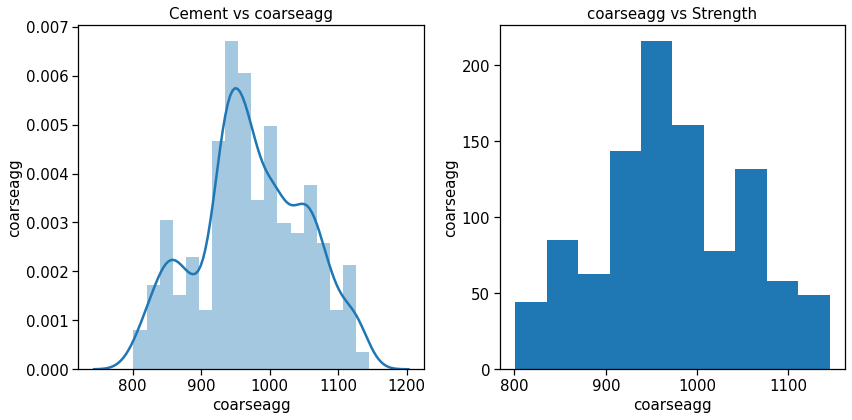

In [59]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

#distplot
sns.distplot(data['coarseagg'],ax=ax1)
ax1.set_xlabel('coarseagg', fontsize=15)
ax1.set_ylabel('coarseagg', fontsize=15)
ax1.set_title('Cement vs coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#histogram
ax2.hist(data['coarseagg'])
ax2.set_xlabel('coarseagg', fontsize=15)
ax2.set_ylabel('coarseagg', fontsize=15)
ax2.set_title('coarseagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

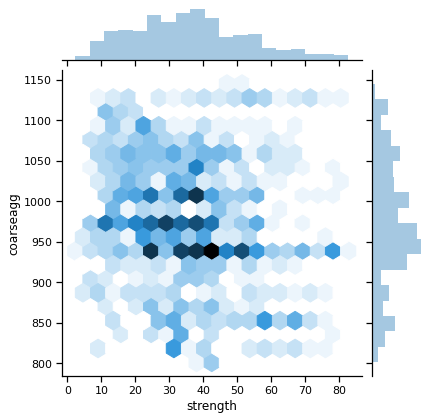

In [60]:
plt.figure(figsize=(12,6))
sns.jointplot(data["strength"], data["coarseagg"], kind="hex")

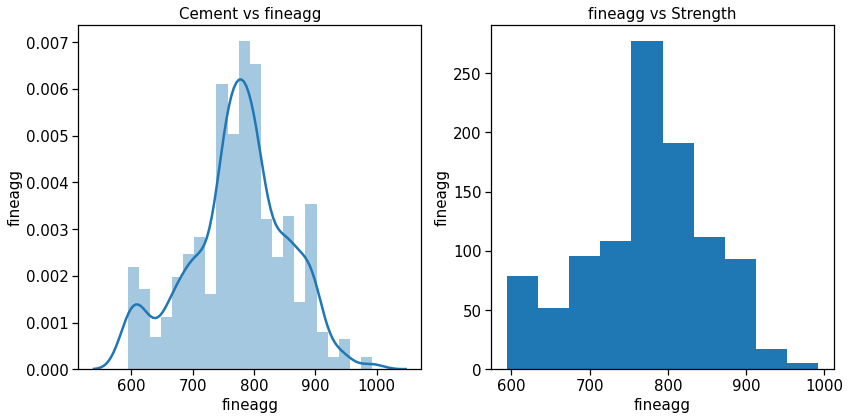

In [61]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

#distplot
sns.distplot(data['fineagg'],ax=ax1)
ax1.set_xlabel('fineagg', fontsize=15)
ax1.set_ylabel('fineagg', fontsize=15)
ax1.set_title('Cement vs fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#histogram
ax2.hist(data['fineagg'])
ax2.set_xlabel('fineagg', fontsize=15)
ax2.set_ylabel('fineagg', fontsize=15)
ax2.set_title('fineagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

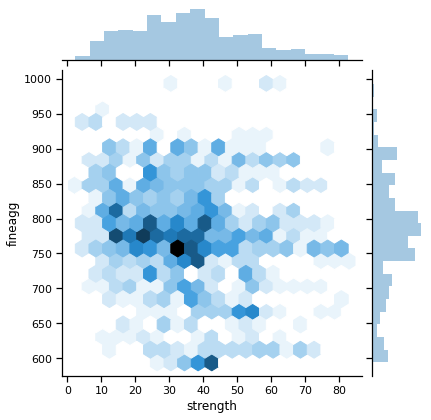

In [62]:
plt.figure(figsize=(12,6))
sns.jointplot(data["strength"], data["fineagg"], kind="hex")

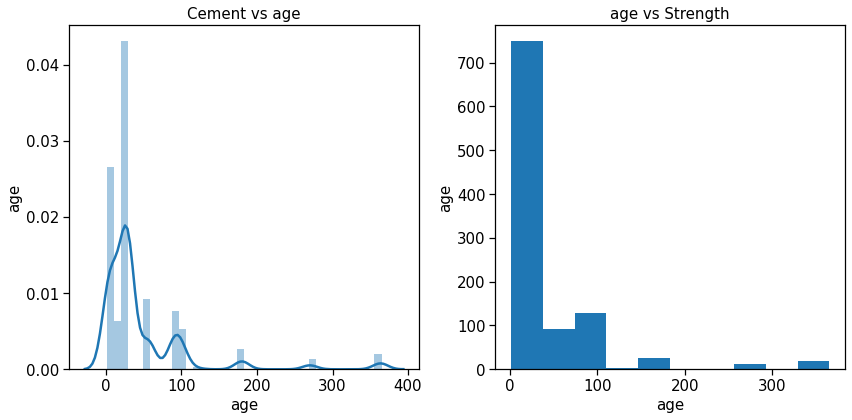

In [63]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

#distplot
sns.distplot(data['age'],ax=ax1)
ax1.set_xlabel('age', fontsize=15)
ax1.set_ylabel('age', fontsize=15)
ax1.set_title('Cement vs age', fontsize=15)
ax1.tick_params(labelsize=15)

#histogram
ax2.hist(data['age'])
ax2.set_xlabel('age', fontsize=15)
ax2.set_ylabel('age', fontsize=15)
ax2.set_title('age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

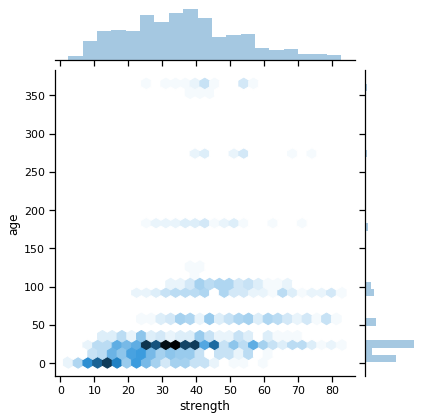

In [64]:
plt.figure(figsize=(12,6))
sns.jointplot(data["strength"], data["age"], kind="hex")

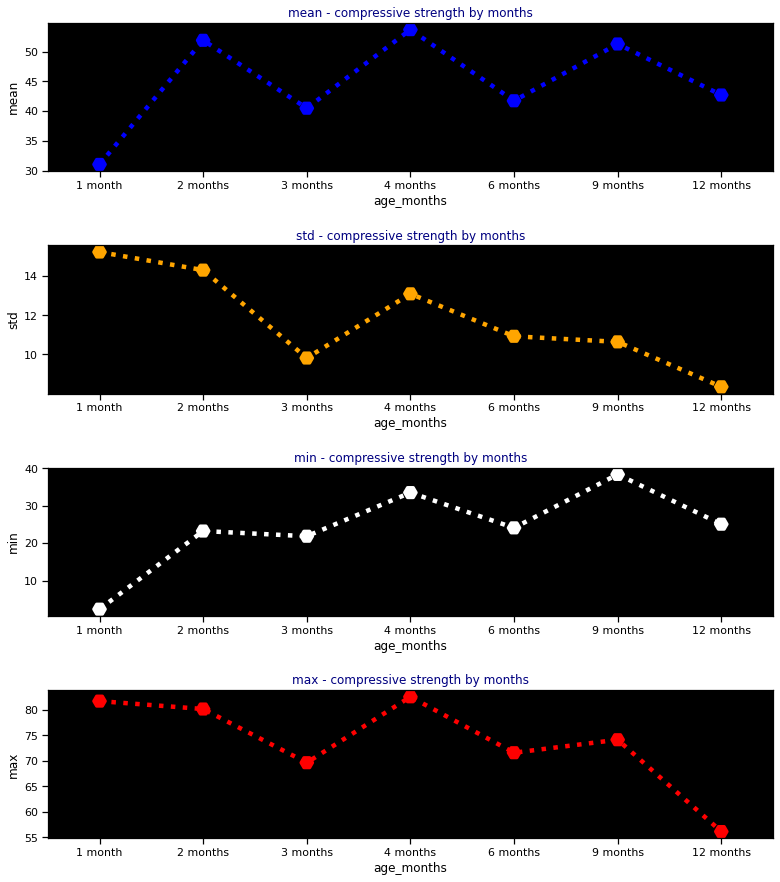

In [67]:
#Compressive strength by months
age_mon = data_age.groupby("age_months")["strength"].describe().reset_index()

order  = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
cols   = [ 'mean', 'std' , 'min' , 'max']
length = len(cols)
cs     = ["b","orange","white","r"] 

fig = plt.figure(figsize=(13,15))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,1,j+1)
    ax = sns.pointplot("age_months",i,data=age_mon,
                       order=order,
                       markers="H",
                       linestyles="dotted",color=k)
    plt.subplots_adjust(hspace=.5)
    ax.set_facecolor("k")
    plt.title(i+" - compressive strength by months",color="navy")

## Scatterplot between Cement, Age, Water with Strength

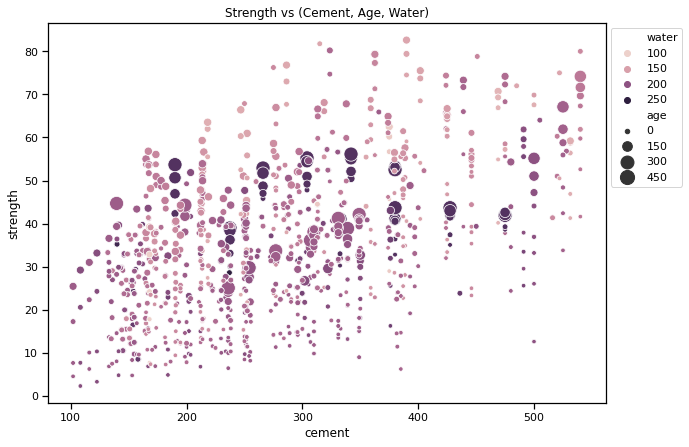

In [68]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="cement", hue="water", size="age", data=data, ax=ax, sizes=(20, 200))
ax.set_title("Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

## Observations (from the above plot)
<b>Strength increases as the amount of cement increases</b>, as the dots move up when we move towards right on the x-axis.<br>
<b>Strength increases with age (as the size of dots represents the age)</b>, this not the case always but can be up to an extent.<br>
<b>Cement with less age requires more cement for higher strength</b>, as the smaller dots are moving up when we move towards right on the x-axis.<br>
<b>The older the cement is the more water it requires</b>, can be confirmed by observing the colour of the dots. Larger dots with dark colour indicate high age and more water.<br>
<b>Concrete strength increases when less water</b> is used in preparing it since the dots on the lower side (y-axis) are darker and the dots on higher-end (y-axis) are brighter.

## Scatterplot between fineagg, ash, superplastic with Strength

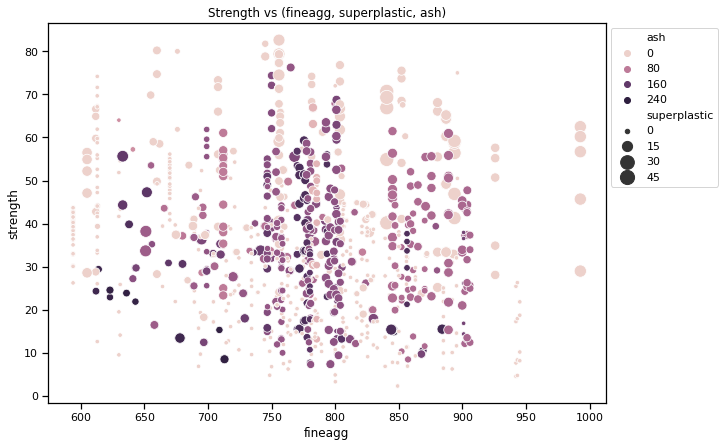

In [69]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="fineagg", hue="ash", size="superplastic", data=data, ax=ax, sizes=(20, 200))
ax.set_title("Strength vs (fineagg, superplastic, ash)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

## Observations (from the above plot)

<b>Compressive strength decreases while ash increases</b>, as darker dots are concentrated in the region representing low compressive strength.<br>
<b>Compressive strength increases with Superplasticizer</b> since larger the dot the higher they are in the plot.


## scatter plot between cement and water
X - axis = water.
Y - axis = cement.
SIZE and COLOR = compressive strength.

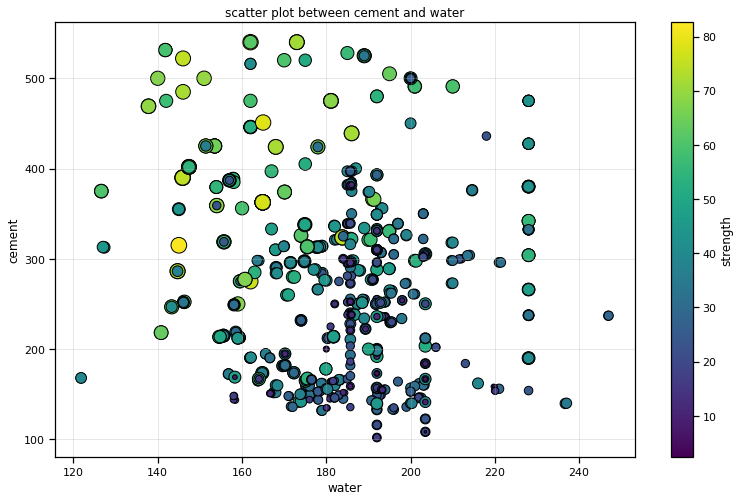

In [70]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(data["water"],data["cement"],
            c=data["strength"],s=data["strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("water")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("scatter plot between cement and water")
plt.grid(True,alpha=.3)
plt.show()

## scatter plot between fine_agg and coarse_agg.
X - axis = fine_agg.
Y - axis = coarse_agg.
SIZE and COLOR = compressive strength.

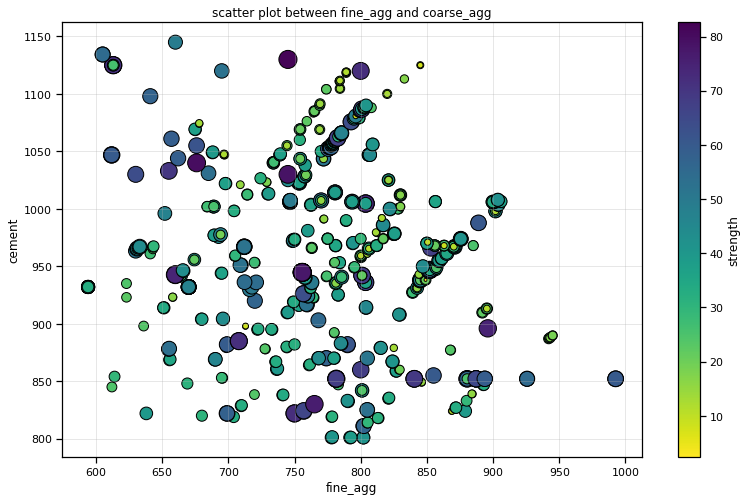

In [71]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(data["fineagg"],data["coarseagg"],
            c=data["strength"],s=data["strength"]*4,
            linewidth=1,edgecolor="k",cmap="viridis_r")
ax.set_facecolor("w")
ax.set_xlabel("fine_agg")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("scatter plot between fine_agg and coarse_agg")
plt.grid(True,alpha=.3)
plt.show()

## 3D plot for cement ,compressive strength and super plasticizer¶
X - Axis = cement.<br>
Y - Axis = compressive strength.<br>
Z - Axis = super plasticizer.<br>
Color = Age

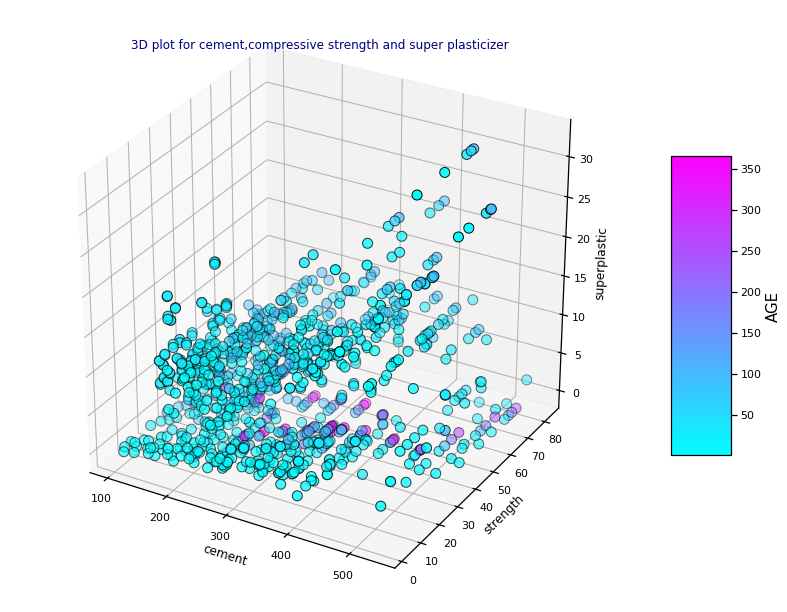

In [72]:
fig = plt.figure(figsize=(14,11))

ax  = fig.gca(projection = "3d")
#plt.subplot(111,projection = "3d") 

plot =  ax.scatter(data["cement"],
           data["strength"],
           data["superplastic"],
           linewidth=1,edgecolor ="k",
           c=data["age"],s=100,cmap="cool")

ax.set_xlabel("cement")
ax.set_ylabel("strength")
ax.set_zlabel("superplastic")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("AGE",fontsize = 15)

plt.title("3D plot for cement,compressive strength and super plasticizer",color="navy")
plt.show()

## Observations from the Biviriate Analysis in general
<b><u>Analysis & distribution plots analysis</u></b><br><br>
1. Distribution of cement appears nearly normal<br>
2. Slag and ash has 2 gaussians and is skewed.It shows the presence of outlies<br>
3. Water and Superplastic have near normal distributions
4. Also ae mentioned above, water has atleast guassians and slighly left skewed.It shows the presence of outlies.
5. superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.<br>
6. Ash has two gaussians and rightly skewed.It shows the presence of outlies.<br>
7. Age data has long tail which confirms the presence of outliers. Srecifically it has multiple guassians and rightly skewed. In general it shows the presence of outlies.<br>
8. Strength is normally distributed and curved <br><br>

<b><u>Relationship between indpendent attributes</u></b>

1. cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0. Cement has strong correlation with strength. <br><br>
2. slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0. Slag is a very weak predictor because the distribution is like a cloud<br><br>
3. ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0. Ash is a weak predictor<br><br>
4. water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability. <br><br>
5. superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes. <br><br>
6. coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.Coarseagg is also a weak predictor<br><br>
7. fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0. Fineagg is also a weak predictor.<br><br>

The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. <br>
So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it. <br>

<b><u>Strength attribute</u></b> : Relationship between dependent and independent attributes

Strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.

<b><u>Strength vs cement</u></b>: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor. strength vs slag: There is no particular trend. strength vs slag: There is also no particular trend. strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor. strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor. Other attributes does not give any strong relationship with strength. Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.So, we will not use Linear model



<b>Off-diagonal analysis between other features</b><br><br>
Cement and slag have strong correlation<br>
Water and super plastic have strong negative correlation<br>


The features,in general, <b>do not seem</b> highly inter correlated .<br>
In any case, cement(0.4978), age(0.3289) andSuper plastic(0,3361)  shows has mild positive correlation with strength<br>
As expected, water and superplastic have strong (negative) correlation<br>
There are other variables with very less correlation there are good correlation among variables : cement -> Slag = -ve relation and strength-> +ve Slag -> ash and fineaggg = -ve Water -> superplastic , fineagg strength = -ve superplastic -> ash and Strength positive correlation between water and slag age -> Strength and water<br>
The cement Strength can vary between min - 17Mpa , 18-28 Mpa and 28 - <70 Mpa,
we can have the dataframe divided into three.

# Generally

We can visually understand 2D, 3D and max up to 4D plots (features represented by colour and size) as shown above, we can further use row-wise and column-wise plotting features by seaborn to do further analysis, but still, we lack the ability to track all these correlations by ourselves. For this reason, we can turn to Machine Learning to capture these relations and give better insights into the problem.

# Feature Engineering techniques

a. Identify opportunities (if any) to extract a new feature from existing features,
drop a feature (if required)<br>
b. Get data model ready and do a train test split.<br>
c. Decide on complexity of the model, should it be simple linear model in terms
of parameters or would a quadratic or higher degree.

In this problem, we do have an opportunity to add a composite feature which is highly useful to predict the concrete strength in MPa (Mega Pascal) namely water-cement ratio. (Ref: https://en.wikipedia.org/wiki/Water%E2%80%93cement_ratio )

There is a non-linear relationship between water-cement ratio and concrete strenth. Smaller values of water-cement ratio (W/C) are associated with higher values of concrete strength where as higher values of ratio provide small concrete strength.

#### K-Means clustering¶

The slow "standard algorithm" for k-means clustering, and its associated expectation-maximization algorithm, is a special case of a Gaussian mixture model, specifically, the limiting case when fixing all covariances to be diagonal, equal and have infinitesimal small variance. Instead of small variances, a hard cluster assignment can also be used to show another equivalence of k-means clustering to a special case of "hard" Gaussian mixture modelling. 

In [73]:
from sklearn.cluster import KMeans

# Create a copy of the data
data_copy = data.copy(deep=True)
tmp_df = data_copy[['ash', 'superplastic', 'slag']]

cluster_range = range( 2, 15 ) 
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(tmp_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              2     5168371.838
1              3     2869632.147
2              4     1759377.572
3              5     1038830.148
4              6      838623.286
5              7      603744.659
6              8      497347.458
7              9      425855.399
8             10      360309.108
9             11      315017.695
10            12      258529.314
11            13      228487.763
12            14      203367.737

In [74]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

tmp_df_z = tmp_df.apply(zscore)

cluster = KMeans( n_clusters = 5, random_state = 2354 )
cluster.fit(tmp_df_z)

prediction=cluster.predict(tmp_df_z)
data_copy["group"] = prediction 

In [75]:
data_copy.head(10)

cement    slag     ash   water  superplastic  coarseagg  fineagg  age  \
0 326.000   0.000 138.000 199.000        11.000    801.000  792.000   28   
1 516.000   0.000   0.000 162.000         8.200    801.000  802.000   28   
2 516.000   0.000   0.000 162.000         8.300    801.000  802.000   28   
3 356.000   0.000 142.000 193.000        11.000    801.000  778.000   28   
4 326.500   0.000 137.900 199.000        10.800    801.100  792.500   28   
5 355.900   0.000 141.600 193.300        11.000    801.400  778.400   28   
6 331.000 170.000   0.000 195.000         8.000    811.000  802.000   28   
7 330.500 169.600   0.000 194.900         8.100    811.000  802.300   28   
8 144.000 170.000 133.000 192.000         8.000    814.000  805.000   28   
9 143.700 170.200 132.600 191.600         8.500    814.100  805.300   28   

   strength  group  
0    40.680      4  
1    41.370      1  
2    41.370      1  
3    40.870      4  
4    38.630      4  
5    40.870      4  
6    56.610      3  
7    56.620      3  
8    29.870      0  
9    29.870      0

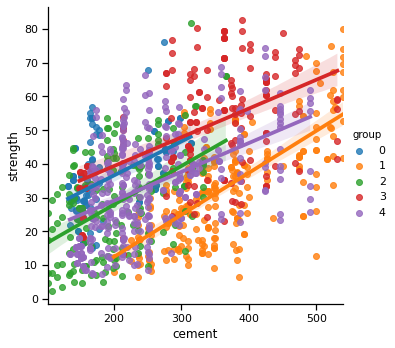

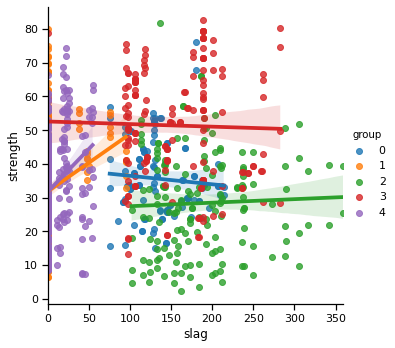

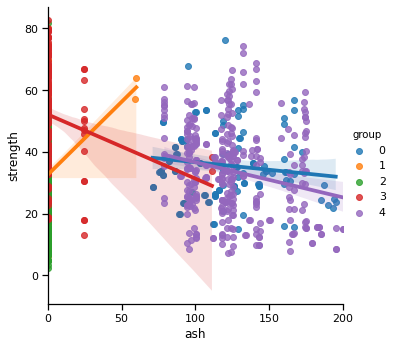

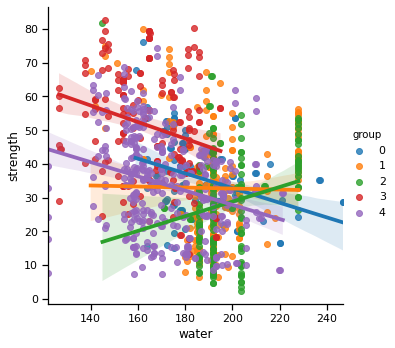

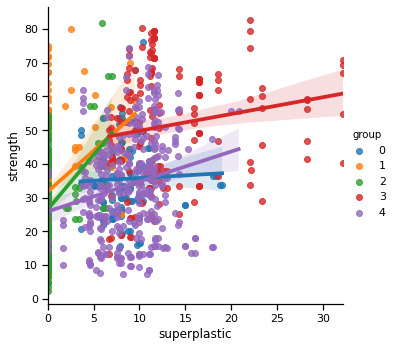

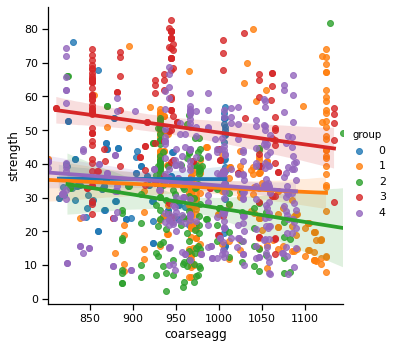

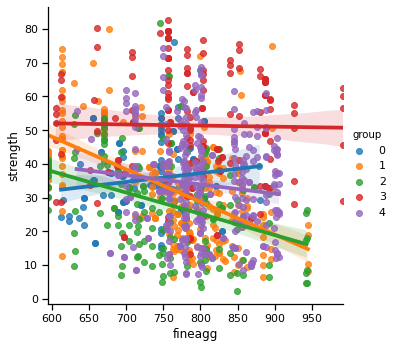

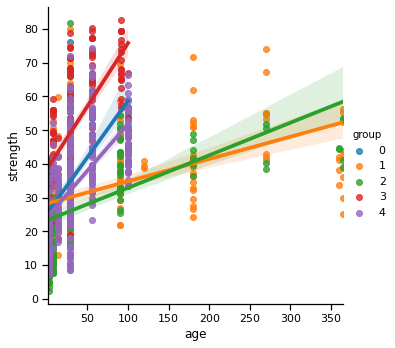

In [76]:
for col in data_copy.columns[:-2]:
    sns.lmplot(data=data_copy, x=col, y='strength', hue='group')


#### Observations from K-Means Clustering

From the above analysis, it can be seen that

<b> * Water, superplastic, age and cement are the most important attributes for Concrete Strength prediction.<br>
<b> * Ash, Coarseagg and Fineagg are not strong predictors. Thus we can try to remove(drop) them in order to increase the performance of our ML Model.<br>
<b> * Slag is mildly important predictor

#### Feature engineering 2
Opportunities (if any) to extract a new feature<br>
<b>Water to Cement ratio</b><br>
A key factor in concrete engineering is the water-cement ratio so we can create this feature to evaluate it in new dataset named 'data_wcratio'.

In [77]:
# pure water-cement ratio feature
data_wcratio = data.copy()
data_wcratio.insert(data_wcratio.shape[-1]-1,'water-cement-ratio', data_wcratio['water']/data_wcratio['cement'])
data_wcratio.drop(['water', 'cement'], axis=1, inplace=True)

# scale it!
scaler = MaxAbsScaler()
data_wcratio_scaled = data_wcratio.copy()
data_wcratio_sc = scaler.fit_transform(data_wcratio)
data_wcratio_scaled.loc[:,:] = data_wcratio_sc

# making the scaling function more accessible
extract_scaling_function = np.ones((1,data_wcratio.shape[1]))
extract_scaling_function = scaler.inverse_transform(extract_scaling_function)

# split data into X and y
y_df = data_wcratio_scaled['strength'].copy()
X_df = data_wcratio_scaled.copy()
X_df.drop('strength', axis=1, inplace=True)

# add it to the dict of datasets for fast and iterative testing
X_train, X_test, y_train, y_test = train_test_split(X_df.values, y_df.values,test_size=0.2, random_state=42, shuffle=True)
comment = 'pure water-cement-ratio; 8 inputs, 1 output'
#dataset[dataset_id] = {'X_train': X_train, 'X_test' : X_test, 'y_train': y_train, 'y_test' : y_test, 'scaler' : scaler, 'scaler_array' : extract_scaling_function, 'comment' : comment, 'dataset' : dataset_id}
#dataset_id += 1

data_wcratio['water-cement-ratio'].head()

0   0.610
1   0.314
2   0.314
3   0.542
4   0.609
Name: water-cement-ratio, dtype: float64

In [ ]:
data_wcratio.head()

####  Water to binder ratio</b><br>


In [78]:
data_ratios_full = data.copy()
data_ratios_full.insert(data_ratios_full.shape[-1]-1,'water-cement-ratio_with_slag_ash',data_ratios_full['water']/(data_ratios_full['cement'] + data_ratios_full['ash'] + data_ratios_full['slag']))
data_ratios_full.drop(['water', 'cement', 'ash', 'slag'], axis=1, inplace=True)

scaler = MaxAbsScaler()
data_ratios_full_scaled = data_ratios_full.copy()
data_ratios_full_sc = scaler.fit_transform(data_ratios_full)
data_ratios_full_scaled.loc[:,:] = data_ratios_full_sc
extract_scaling_function = np.ones((1,data_ratios_full.shape[1]))
extract_scaling_function = scaler.inverse_transform(extract_scaling_function)

# split data into X and y
y_df = data_ratios_full_scaled['strength'].copy()
X_df = data_ratios_full_scaled.copy()
X_df.drop('strength', axis=1, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X_df.values, y_df.values,test_size=0.2, random_state=42, shuffle=True)
data_ratios_full['water-cement-ratio_with_slag_ash'].head()

0   0.429
1   0.314
2   0.314
3   0.388
4   0.429
Name: water-cement-ratio_with_slag_ash, dtype: float64

In [79]:
data_ratios_full = data.copy()
data_ratios_full.insert(data_ratios_full.shape[-1]-1,'water-cement-ratio_with_slag_ash',data_ratios_full['water']/(data_ratios_full['cement'] + data_ratios_full['ash'] + data_ratios_full['slag']))
data_ratios_full.drop(['water', 'cement', 'ash', 'slag'], axis=1, inplace=True)

data_ratios_full['water-cement-ratio_with_slag_ash'].head()

0   0.429
1   0.314
2   0.314
3   0.388
4   0.429
Name: water-cement-ratio_with_slag_ash, dtype: float64

#### Model Complexity & Outliers
Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help<br>

As provided in the dataset information the strength of the concrete is a highly nonlinear function of age and ingredients.
With few weak exemptions attributes does not give any strong relationship with strength. Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

Thus using a simple linear model won't help in this problem to get better modeling accuracy. Use of quadratic and higher degree makes sense in this case to incorporate the nonlinear relationship between target and independent attributes

In order to incorporate the non-linear feature interaction among independent features we choose to add polynomial features in our models with degree 2 or 3.
##### Treatment of outliers
Replace outliers with their attribute respective Median and run the models to evaluate the relative behavior.

### Creating the model and tuning it

We will try the following algorithms:
1. Linear Regression
2. Linear Regression with Polynomial features of degree 2
3. Linear Regression with Polynomial features of degree 3
4. Ridge 
5. Ridge with polynomial features of degree 2
6. Ridge with polynomial features of degree 3
7. Lasso 
8. Lasso with polynomial features of degree 2
9. Lasso with polynomial features of degree 3
10. Decision Trees
11. Random forest
12. Ada boosting
13. Gradient boosting
14. KNN
15. Support Vector machines

We will always scale the data as confirmed in EDA

we will perform the analysis in following iterations
1. Build the models and perform analysis on all data
2. Treat outliers and build models again
3. Consider the results of Feature engineering (k-means clustering)
4. Discuss and compare all the results

In [80]:
data = pd.read_csv('concrete.csv')

In [81]:
# Helper classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np

class Regressor(object):
    """
    Class representing a regressor. 
    Based on the parameters supplied in the constructor, this class constructs a pipeline object.
    The constructed pipeline adds 
    - Standard scalar if the scale parameter is passed as True
    - Polynomial Feature transformations if the include_polymomial flag is set as True
    """
    def __init__(self, name, model, scale=True, include_polynomial=True, degree=2):
        self.name = name
        self.model = model
        steps = []
        if scale:
            steps.append(('scaler', StandardScaler()))
        if include_polynomial:
            steps.append(('poly_features', PolynomialFeatures(degree=degree)))
        steps.append(('model', model))
        self.steps = steps

    def get_name(self):
        return self.name

    def get_model(self):
        return self.model

    def get(self):
        return Pipeline(steps=self.steps)

    def feature_imp(self):
        try:
            return self.model.feature_importances_
        except AttributeError:
            try:
                return self.model.coef_
            except AttributeError:
                return None


class ModelsBuilder(object):
    '''
    This class is responsible for building the model and constructing a results dataframe.
    It accepts several regressor objects.
    '''
    def __init__(self, regressors, data, target, test_size=0.3, seed=42):
        self.regressors = regressors
        self.split_data = train_test_split(data.drop(target, axis=1), data[target], test_size=test_size, random_state=seed)
        self.data = data
        self.target = target

    def build(self, k_fold_splits=10):
        results = pd.DataFrame(columns=['model', 'training_score', 'test_score', 'k_fold_mean', 'k_fold_std', 'MSE'])
        for regressor in self.regressors:
            regressor.get().fit(self.split_data[0], self.split_data[2])
            cross_vals = cross_val_score(regressor.get(), self.data.drop(self.target, axis=1), self.data[self.target], cv=KFold(n_splits=k_fold_splits))
            mean = round(cross_vals.mean(), 3)
            std = round(cross_vals.std(), 3)
            results = results.append({
                'model': regressor.get_name(),
                'training_score': round(regressor.get().score(self.split_data[0], self.split_data[2]), 3),
                'test_score': round(regressor.get().score(self.split_data[1], self.split_data[3]),3), 
                'k_fold_mean': mean, 
                'k_fold_std': std,
                #'MSE': mean_squared_error('y_true', 'y_pred'),
                '95% confidence intervals': str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))
                }, ignore_index=True)

        return results


class OutliersImputer(SimpleImputer):
    '''
    This class extends the functionality of SimpleImputer to handle outliers.
    '''
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        super().__init__(strategy=strategy)

    def fit(self, X, y=None):
        for i in X.columns:
            q1, q2, q3 = X[i].quantile([0.25,0.5,0.75])
            IQR = q3 - q1
            a = X[i] > q3 + 1.5*IQR
            b = X[i] < q1 - 1.5*IQR
            X[i] = np.where(a | b, np.NaN, X[i])  
        return super().fit(X, y)

In [82]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

regressors = [
    Regressor('Linear Regression', LinearRegression(), scale=True), 
    Regressor('Linear Regression degree 2', LinearRegression(), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Linear Regression degree 3', LinearRegression(), 
              scale=True, include_polynomial=True, degree=3), 
    Regressor('Ridge', Ridge(random_state=42), scale=True), 
    Regressor('Ridge degree 2', Ridge(random_state=42), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Ridge degree 3', Ridge(random_state=42), 
              scale=True, include_polynomial=True, degree=3),
    Regressor('Lasso', Lasso(random_state=42), scale=True), 
    Regressor('Lasso degree 2', Lasso(random_state=42), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Lasso degree 3', Lasso(random_state=42), 
              scale=True, include_polynomial=True, degree=3), 
    Regressor('Decision Tree', DecisionTreeRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('Ada boosting', AdaBoostRegressor(random_state=42), scale=True),
    Regressor('Random forest', RandomForestRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('Gradient boosting', GradientBoostingRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('KNN', KNeighborsRegressor(n_neighbors=3), scale=True),
    Regressor('SVR', SVR(gamma='auto'), scale=True),
]

In [83]:
# 1 - Use all data
result = ModelsBuilder(regressors, data, 'strength').build()
tmp_best = result.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result = result.append(tmp_best, ignore_index=True)
result

model  training_score  test_score  k_fold_mean  \
0                Linear Regression           0.827       0.744        0.778   
1       Linear Regression degree 2           0.827       0.744        0.778   
2       Linear Regression degree 3           0.935       0.786        0.850   
3                            Ridge           0.827       0.741        0.777   
4                   Ridge degree 2           0.827       0.741        0.777   
5                   Ridge degree 3           0.929       0.860        0.863   
6                            Lasso           0.725       0.688        0.690   
7                   Lasso degree 2           0.725       0.688        0.690   
8                   Lasso degree 3           0.741       0.670        0.694   
9                    Decision Tree           0.732       0.661        0.660   
10                    Ada boosting           0.844       0.798        0.794   
11                   Random forest           0.841       0.805        0.770   
12               Gradient boosting           0.981       0.910        0.925   
13                             KNN           0.856       0.705        0.703   
14                             SVR           0.482       0.432        0.472   
15  Best Model = Gradient boosting           0.981       0.910        0.925   

    k_fold_std  MSE 95% confidence intervals  
0        0.043  nan          0.694 <-> 0.862  
1        0.043  nan          0.694 <-> 0.862  
2        0.047  nan          0.758 <-> 0.942  
3        0.044  nan          0.691 <-> 0.863  
4        0.044  nan          0.691 <-> 0.863  
5        0.040  nan          0.785 <-> 0.941  
6        0.042  nan          0.608 <-> 0.772  
7        0.042  nan          0.608 <-> 0.772  
8        0.043  nan           0.61 <-> 0.778  
9        0.049  nan          0.564 <-> 0.756  
10       0.034  nan          0.727 <-> 0.861  
11       0.034  nan          0.703 <-> 0.837  
12       0.022  nan          0.882 <-> 0.968  
13       0.061  nan          0.583 <-> 0.823  
14       0.044  nan          0.386 <-> 0.558  
15       0.022  nan          0.882 <-> 0.968

In [93]:
data= pd.read_csv('concrete.csv')

In [94]:
# - Ouliers treatment

# Count outliers
q1= data.quantile(0.25)
q3= data.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((data > (q3+1.5*IQR)) | (data < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(data), 2)
outliers

No. of outliers  Percentage of outliers
cement                      0                   0.000
slag                        2                   0.190
ash                         0                   0.000
water                       9                   0.870
superplastic               10                   0.970
coarseagg                   0                   0.000
fineagg                     5                   0.490
age                        59                   5.730
strength                    4                   0.390

In [95]:
data[['age','superplastic']] = OutliersImputer().fit_transform(data[['age','superplastic']])

In [96]:
# Count outliers
q1= data.quantile(0.25)
q3= data.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((data > (q3+1.5*IQR)) | (data < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(data), 2)
outliers

No. of outliers  Percentage of outliers
cement                      0                   0.000
slag                        2                   0.190
ash                         0                   0.000
water                       9                   0.870
superplastic                0                   0.000
coarseagg                   0                   0.000
fineagg                     5                   0.490
age                       131                  12.720
strength                    4                   0.390

In [97]:
# 2. Treated Outliers
result_outliers_treatment = ModelsBuilder(regressors, data, 'strength').build()
tmp_best = result_outliers_treatment.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result_outliers_treatment = result_outliers_treatment.append(tmp_best, ignore_index=True)
result_outliers_treatment

model  training_score  test_score  k_fold_mean  \
0                Linear Regression           0.871       0.836        0.843   
1       Linear Regression degree 2           0.871       0.836        0.843   
2       Linear Regression degree 3           0.947       0.829        0.878   
3                            Ridge           0.870       0.836        0.843   
4                   Ridge degree 2           0.870       0.836        0.843   
5                   Ridge degree 3           0.941       0.872        0.885   
6                            Lasso           0.772       0.761        0.754   
7                   Lasso degree 2           0.772       0.761        0.754   
8                   Lasso degree 3           0.794       0.752        0.763   
9                    Decision Tree           0.740       0.667        0.684   
10                    Ada boosting           0.838       0.793        0.790   
11                   Random forest           0.842       0.798        0.771   
12               Gradient boosting           0.982       0.916        0.926   
13                             KNN           0.887       0.759        0.791   
14                             SVR           0.533       0.498        0.536   
15  Best Model = Gradient boosting           0.982       0.916        0.926   

    k_fold_std  MSE 95% confidence intervals  
0        0.026  nan          0.792 <-> 0.894  
1        0.026  nan          0.792 <-> 0.894  
2        0.036  nan          0.807 <-> 0.949  
3        0.026  nan          0.792 <-> 0.894  
4        0.026  nan          0.792 <-> 0.894  
5        0.025  nan          0.836 <-> 0.934  
6        0.029  nan          0.697 <-> 0.811  
7        0.029  nan          0.697 <-> 0.811  
8        0.028  nan          0.708 <-> 0.818  
9        0.054  nan           0.578 <-> 0.79  
10       0.031  nan          0.729 <-> 0.851  
11       0.033  nan          0.706 <-> 0.836  
12       0.019  nan          0.889 <-> 0.963  
13       0.035  nan           0.722 <-> 0.86  
14       0.058  nan           0.422 <-> 0.65  
15       0.019  nan          0.889 <-> 0.963

In [98]:
# 3 - Remove features based on k-means clustering
result_feature_engg = ModelsBuilder(regressors, data.drop(['ash','coarseagg', 'fineagg'], axis=1), 'strength').build()
tmp_best = result_feature_engg.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result_feature_engg = result_feature_engg.append(tmp_best, ignore_index=True)
result_feature_engg

model  training_score  test_score  k_fold_mean  \
0                Linear Regression           0.832       0.796        0.808   
1       Linear Regression degree 2           0.832       0.796        0.808   
2       Linear Regression degree 3           0.885       0.847        0.850   
3                            Ridge           0.832       0.796        0.809   
4                   Ridge degree 2           0.832       0.796        0.809   
5                   Ridge degree 3           0.885       0.846        0.851   
6                            Lasso           0.771       0.761        0.754   
7                   Lasso degree 2           0.771       0.761        0.754   
8                   Lasso degree 3           0.783       0.750        0.758   
9                    Decision Tree           0.740       0.681        0.694   
10                    Ada boosting           0.830       0.785        0.782   
11                   Random forest           0.837       0.794        0.766   
12               Gradient boosting           0.976       0.891        0.914   
13                             KNN           0.913       0.810        0.829   
14                             SVR           0.656       0.638        0.662   
15  Best Model = Gradient boosting           0.976       0.891        0.914   

    k_fold_std  MSE 95% confidence intervals  
0        0.026  nan          0.757 <-> 0.859  
1        0.026  nan          0.757 <-> 0.859  
2        0.032  nan          0.787 <-> 0.913  
3        0.026  nan           0.758 <-> 0.86  
4        0.026  nan           0.758 <-> 0.86  
5        0.032  nan          0.788 <-> 0.914  
6        0.028  nan          0.699 <-> 0.809  
7        0.028  nan          0.699 <-> 0.809  
8        0.032  nan          0.695 <-> 0.821  
9        0.054  nan            0.588 <-> 0.8  
10       0.033  nan          0.717 <-> 0.847  
11       0.033  nan          0.701 <-> 0.831  
12       0.021  nan          0.873 <-> 0.955  
13       0.033  nan          0.764 <-> 0.894  
14       0.046  nan          0.572 <-> 0.752  
15       0.021  nan          0.873 <-> 0.955

In [99]:
# 4 - Use the dataset 'data_wcratio'
result = ModelsBuilder(regressors, data_wcratio, 'strength').build()
tmp_best = result.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result = result.append(tmp_best, ignore_index=True)
result

model  training_score  test_score  k_fold_mean  \
0                Linear Regression           0.801       0.754        0.575   
1       Linear Regression degree 2           0.801       0.754        0.575   
2       Linear Regression degree 3           0.911       0.804        0.445   
3                            Ridge           0.801       0.754        0.577   
4                   Ridge degree 2           0.801       0.754        0.577   
5                   Ridge degree 3           0.910       0.810        0.521   
6                            Lasso           0.713       0.702        0.612   
7                   Lasso degree 2           0.713       0.702        0.612   
8                   Lasso degree 3           0.731       0.705        0.581   
9                    Decision Tree           0.745       0.736        0.599   
10                    Ada boosting           0.848       0.809        0.716   
11                   Random forest           0.833       0.819        0.687   
12               Gradient boosting           0.982       0.925        0.813   
13                             KNN           0.859       0.637        0.534   
14                             SVR           0.478       0.381        0.320   
15  Best Model = Gradient boosting           0.982       0.925        0.813   

    k_fold_std  MSE 95% confidence intervals  
0        0.368  nan         -0.146 <-> 1.296  
1        0.368  nan         -0.146 <-> 1.296  
2        0.430  nan         -0.398 <-> 1.288  
3        0.365  nan         -0.138 <-> 1.292  
4        0.365  nan         -0.138 <-> 1.292  
5        0.327  nan          -0.12 <-> 1.162  
6        0.084  nan          0.447 <-> 0.777  
7        0.084  nan          0.447 <-> 0.777  
8        0.150  nan          0.287 <-> 0.875  
9        0.131  nan          0.342 <-> 0.856  
10       0.087  nan          0.545 <-> 0.887  
11       0.099  nan          0.493 <-> 0.881  
12       0.073  nan           0.67 <-> 0.956  
13       0.157  nan          0.226 <-> 0.842  
14       0.113  nan          0.099 <-> 0.541  
15       0.073  nan           0.67 <-> 0.956

In [100]:
# 5 - Use the dataset 'data_ratios_full'
result = ModelsBuilder(regressors, data_ratios_full, 'strength').build()
tmp_best = result.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result = result.append(tmp_best, ignore_index=True)
result

model  training_score  test_score  k_fold_mean  \
0                Linear Regression           0.749       0.718        0.582   
1       Linear Regression degree 2           0.749       0.718        0.582   
2       Linear Regression degree 3           0.840       0.780       -0.028   
3                            Ridge           0.749       0.718        0.583   
4                   Ridge degree 2           0.749       0.718        0.583   
5                   Ridge degree 3           0.839       0.788        0.235   
6                            Lasso           0.689       0.713        0.623   
7                   Lasso degree 2           0.689       0.713        0.623   
8                   Lasso degree 3           0.700       0.725        0.614   
9                    Decision Tree           0.803       0.801        0.645   
10                    Ada boosting           0.830       0.806        0.669   
11                   Random forest           0.842       0.841        0.695   
12               Gradient boosting           0.970       0.904        0.721   
13                             KNN           0.859       0.730        0.496   
14                             SVR           0.522       0.475        0.380   
15  Best Model = Gradient boosting           0.970       0.904        0.721   

    k_fold_std  MSE 95% confidence intervals  
0        0.214  nan          0.163 <-> 1.001  
1        0.214  nan          0.163 <-> 1.001  
2        2.077  nan         -4.099 <-> 4.043  
3        0.212  nan          0.167 <-> 0.999  
4        0.212  nan          0.167 <-> 0.999  
5        1.290  nan         -2.293 <-> 2.763  
6        0.136  nan           0.356 <-> 0.89  
7        0.136  nan           0.356 <-> 0.89  
8        0.114  nan          0.391 <-> 0.837  
9        0.182  nan          0.288 <-> 1.002  
10       0.158  nan          0.359 <-> 0.979  
11       0.171  nan            0.36 <-> 1.03  
12       0.129  nan          0.468 <-> 0.974  
13       0.222  nan          0.061 <-> 0.931  
14       0.170  nan          0.047 <-> 0.713  
15       0.129  nan          0.468 <-> 0.974

# Creating the model and tuning it

2. Techniques employed to squeeze that extra performance out of the model without making it over fit. Use Grid Search or Random Search on any of the two models used above.<br> Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

In [101]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['ash', 'coarseagg', 'fineagg', 'strength'], axis=1), 
                                                   data['strength'], 
                                                   test_size = 0.2, 
                                                   random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((824, 5), (206, 5), (824,), (206,))

In [102]:
# Prepare parameter grid
param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

In [103]:
# Perform hyper parameter tuning using GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 10, n_iter=500)
rs.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2608 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 3297 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4082 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  9.3min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae',
                                                      'friedman_mse'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', None],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450],
                                        'subsample': [0.8, 0.9, 1.0]},
                   return_train_score=True, verbose=2)

In [104]:
mean = rs.best_score_
std = rs.cv_results_['mean_test_score'].std()

print(f"Mean training score: {rs.cv_results_['mean_train_score'].mean()}")
print(f"Mean validation score: {mean}")
print(f"Validation standard deviation: {std}")
print(f"95% confidence interval: {str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))}")
print(f"Best parameters: {rs.best_params_}")
print(f"Test score: {rs.score(X_test, y_test)}")

Mean training score: 0.9337867807306331
Mean validation score: 0.9306826984830326
Validation standard deviation: 0.037567872740352004
95% confidence interval: 0.857 <-> 1.004
Best parameters: {'subsample': 0.8, 'n_estimators': 400, 'max_leaf_nodes': 8, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1, 'criterion': 'mse'}
Test score: 0.9279255246723797
